In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy import stats

file_path = '/content/identifiers_removed_merged.csv' # Replace with the path to your CSV file
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

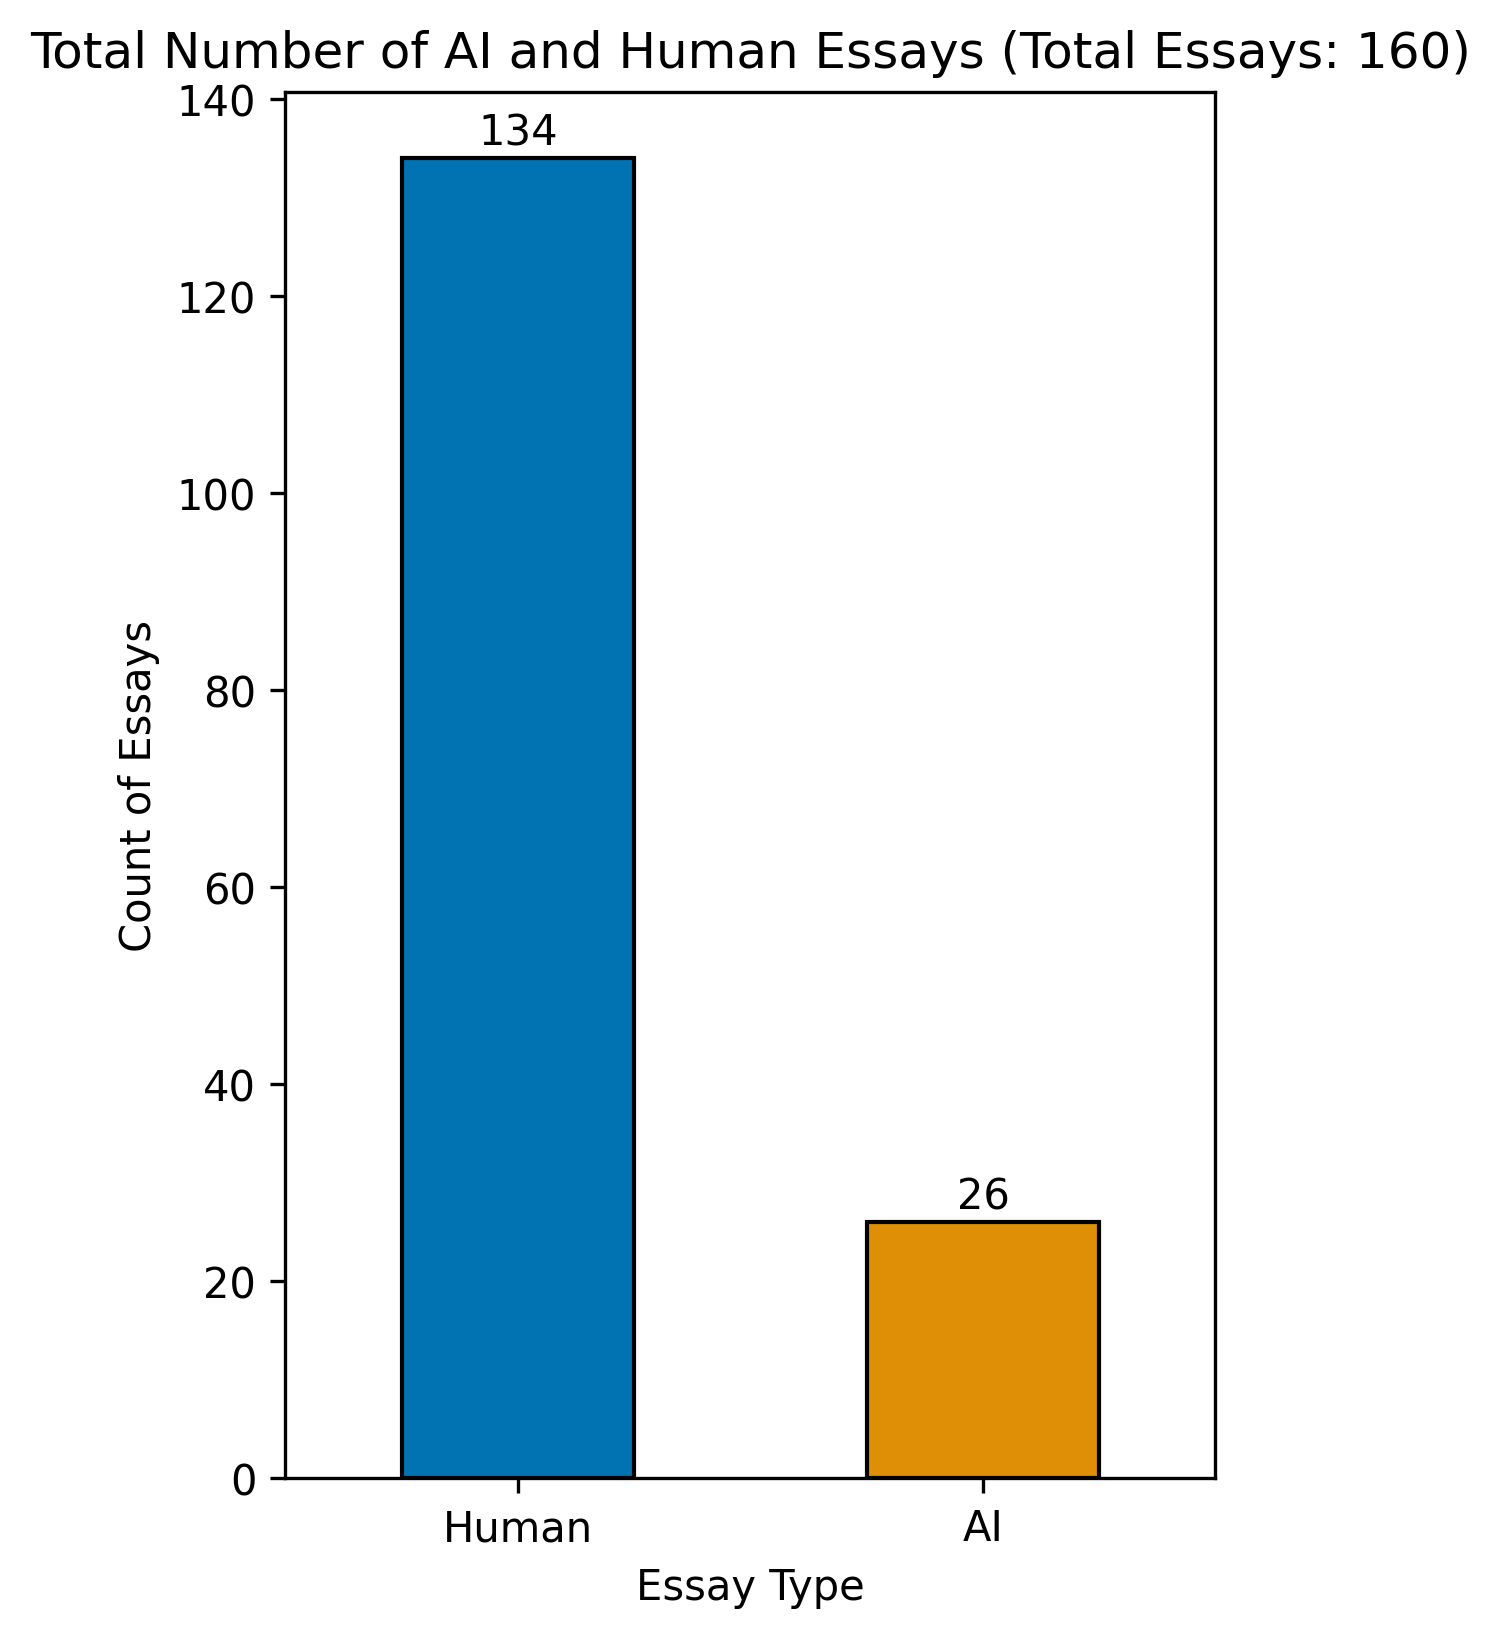

In [5]:
df = pd.read_csv(file_path)

# Counting the number of AI and Human essays for each contributor
essay_counts = df.groupby(['Timestamp', 'AI/Human']).size().unstack().fillna(0)
essay_counts['Total'] = essay_counts.sum(axis=1)

# Calculating the total number of AI and Human essays
total_essays = essay_counts.sum()

# Reordering the columns so that 'Human' comes first
total_essays_reordered = total_essays.reindex(['Human', 'AI'])

total_essays = int(essay_counts['Total'].sum(axis=0))

# Creating the bar plot with specified modifications
plt.figure(figsize=(4, 6))
ax = total_essays_reordered.plot(kind='bar', color=[sns.color_palette("colorblind")[0], sns.color_palette("colorblind")[1]], edgecolor='black')
plt.title(f'Total Number of AI and Human Essays (Total Essays: {total_essays})')
plt.xlabel('Essay Type')
plt.ylabel('Count of Essays')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Adding the count on top of the bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 6), textcoords='offset points')

plt.show()


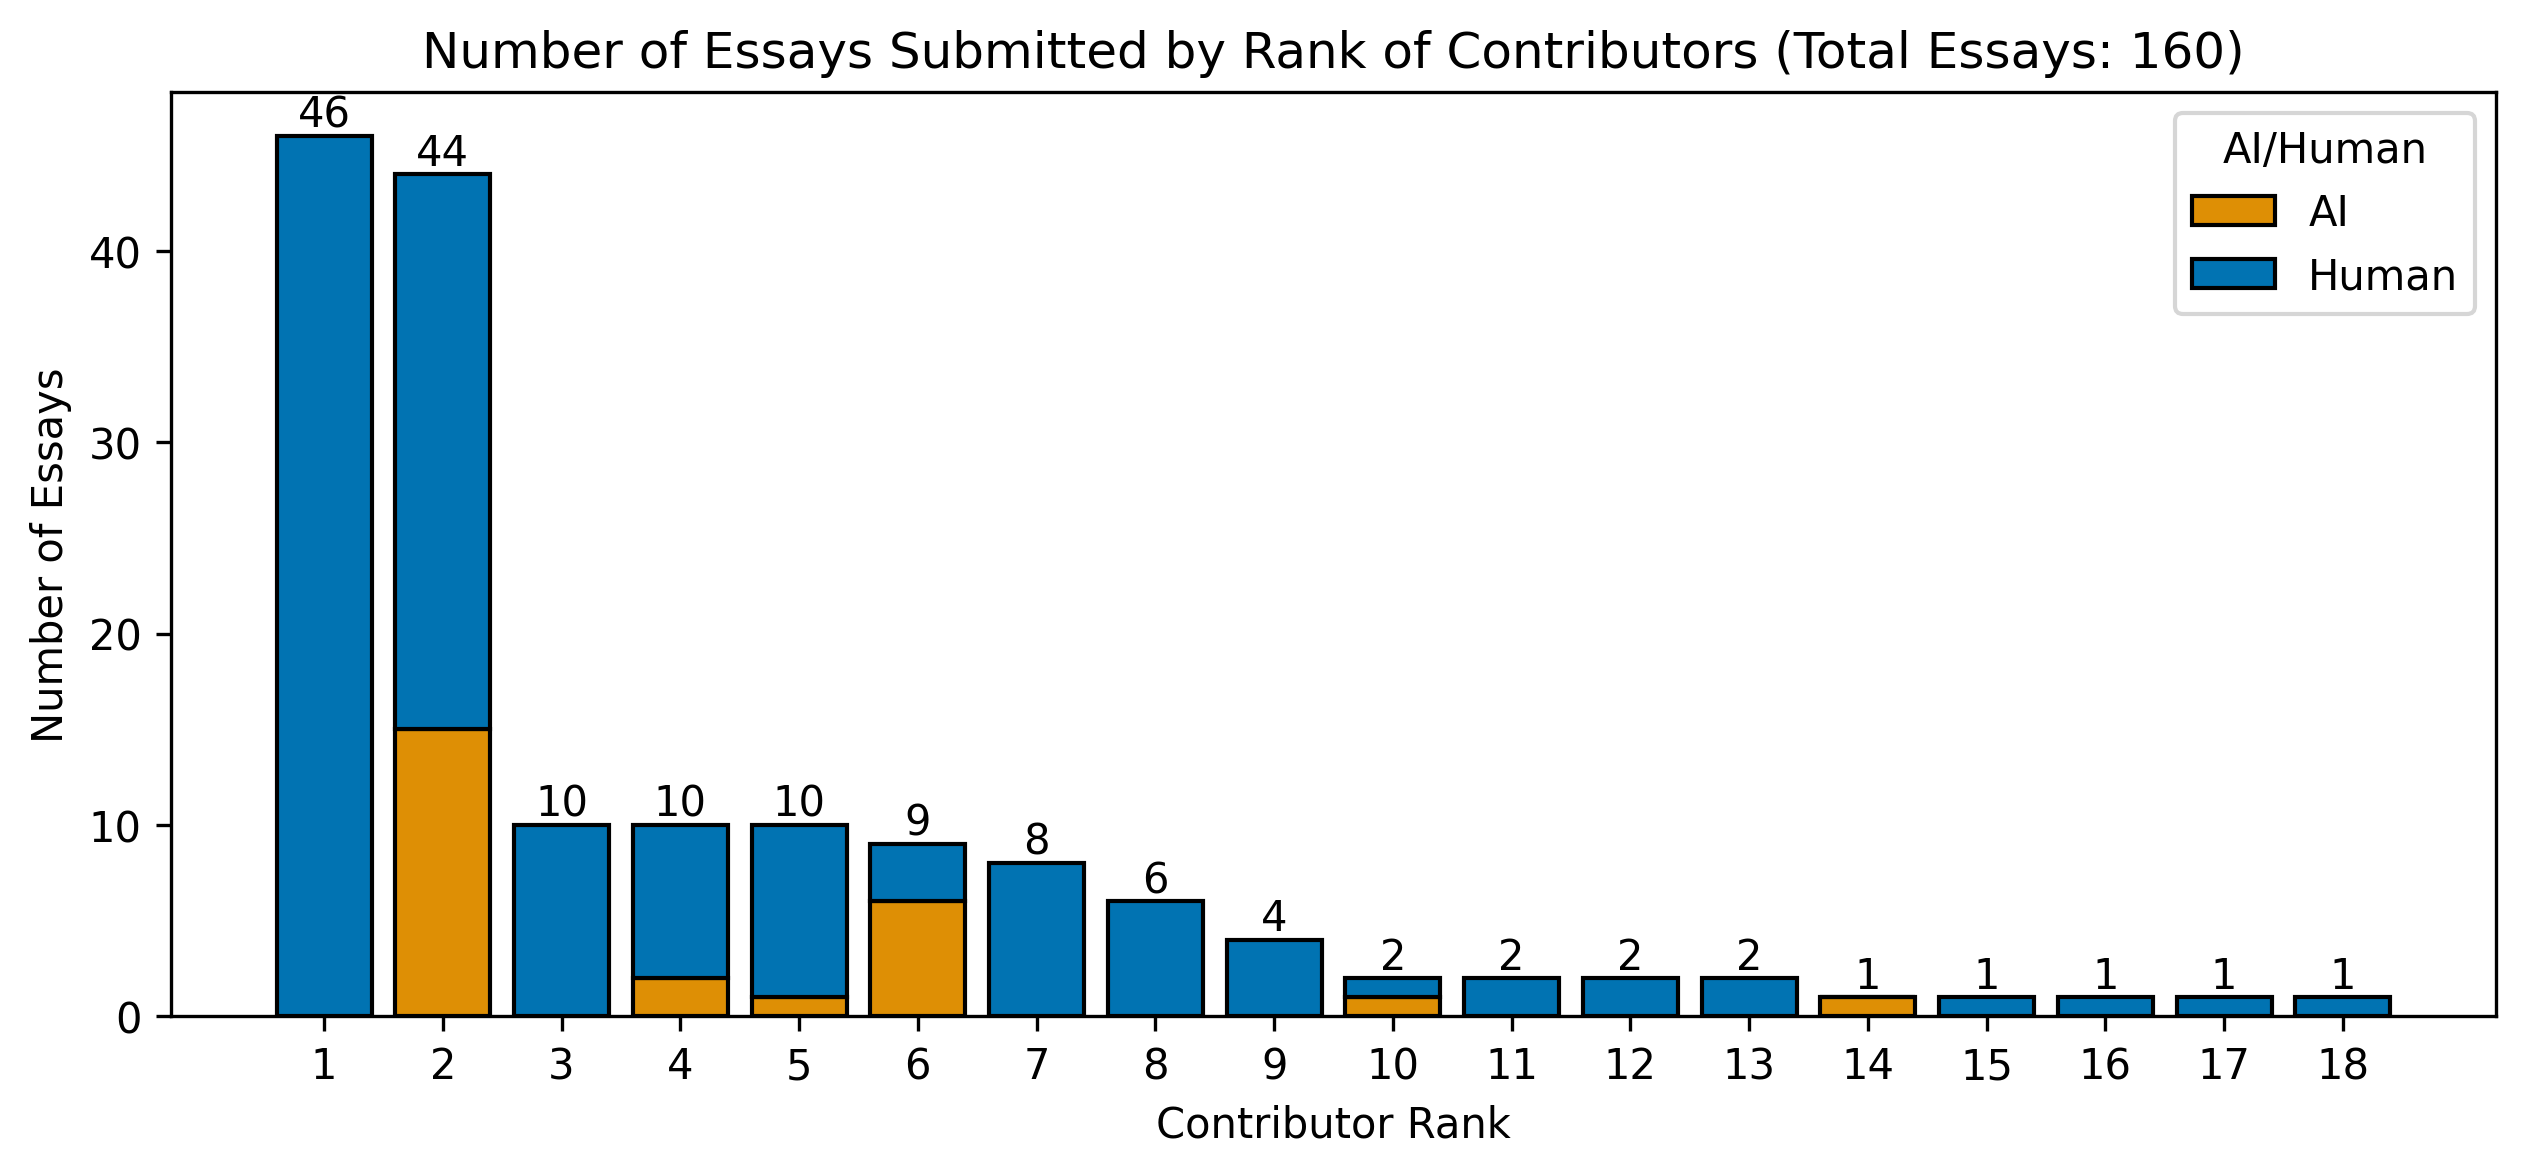

In [6]:
# Load the dataset from the CSV file
df = pd.read_csv(file_path)

# Counting the number of AI and Human essays for each contributor using 'Timestamp'
essay_counts = df.groupby(['Timestamp', 'AI/Human']).size().unstack().fillna(0)
# Calculating the total essays contributed by each contributor
essay_counts['Total'] = essay_counts.sum(axis=1)

# Sorting the dataframe by total essays contributed
sorted_essay_counts = essay_counts.sort_values(by='Total', ascending=False)
# Adding a rank column based on the total essays contributed
sorted_essay_counts['Rank'] = sorted_essay_counts['Total'].rank(ascending=False, method='first').astype(int)

# Getting the rank as a separate list for labeling on the x-axis
ranks = sorted_essay_counts['Rank'].tolist()

# Setting up the colors for each classification
colors = {'Human': sns.color_palette("colorblind")[0], 'AI': sns.color_palette("colorblind")[1]}

# Creating the plot with sorted data and black borders
fig, ax = plt.subplots(figsize=(10, 4))
for i, col in enumerate(sorted_essay_counts.columns.drop(['Total', 'Rank'])):
    ax.bar(ranks, sorted_essay_counts[col], color=colors[col], edgecolor='black', label=col, bottom=sorted_essay_counts[sorted_essay_counts.columns.drop(['Total', 'Rank'])[:i]].sum(axis=1))

# Adding labels and title
total_essays = int(essay_counts['Total'].sum(axis=0))
plt.title(f'Number of Essays Submitted by Rank of Contributors (Total Essays: {total_essays})')
plt.xlabel('Contributor Rank')
plt.ylabel('Number of Essays')
plt.legend(title='AI/Human')

# Setting the x-axis labels to the rank
ax.set_xticks(ranks)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=0)

# Adding the total number of essays at the top of the bars
for rank, total in zip(ranks, sorted_essay_counts['Total']):
    plt.text(rank, total, int(total), va='bottom', ha='center')

# Show the plot
plt.show()


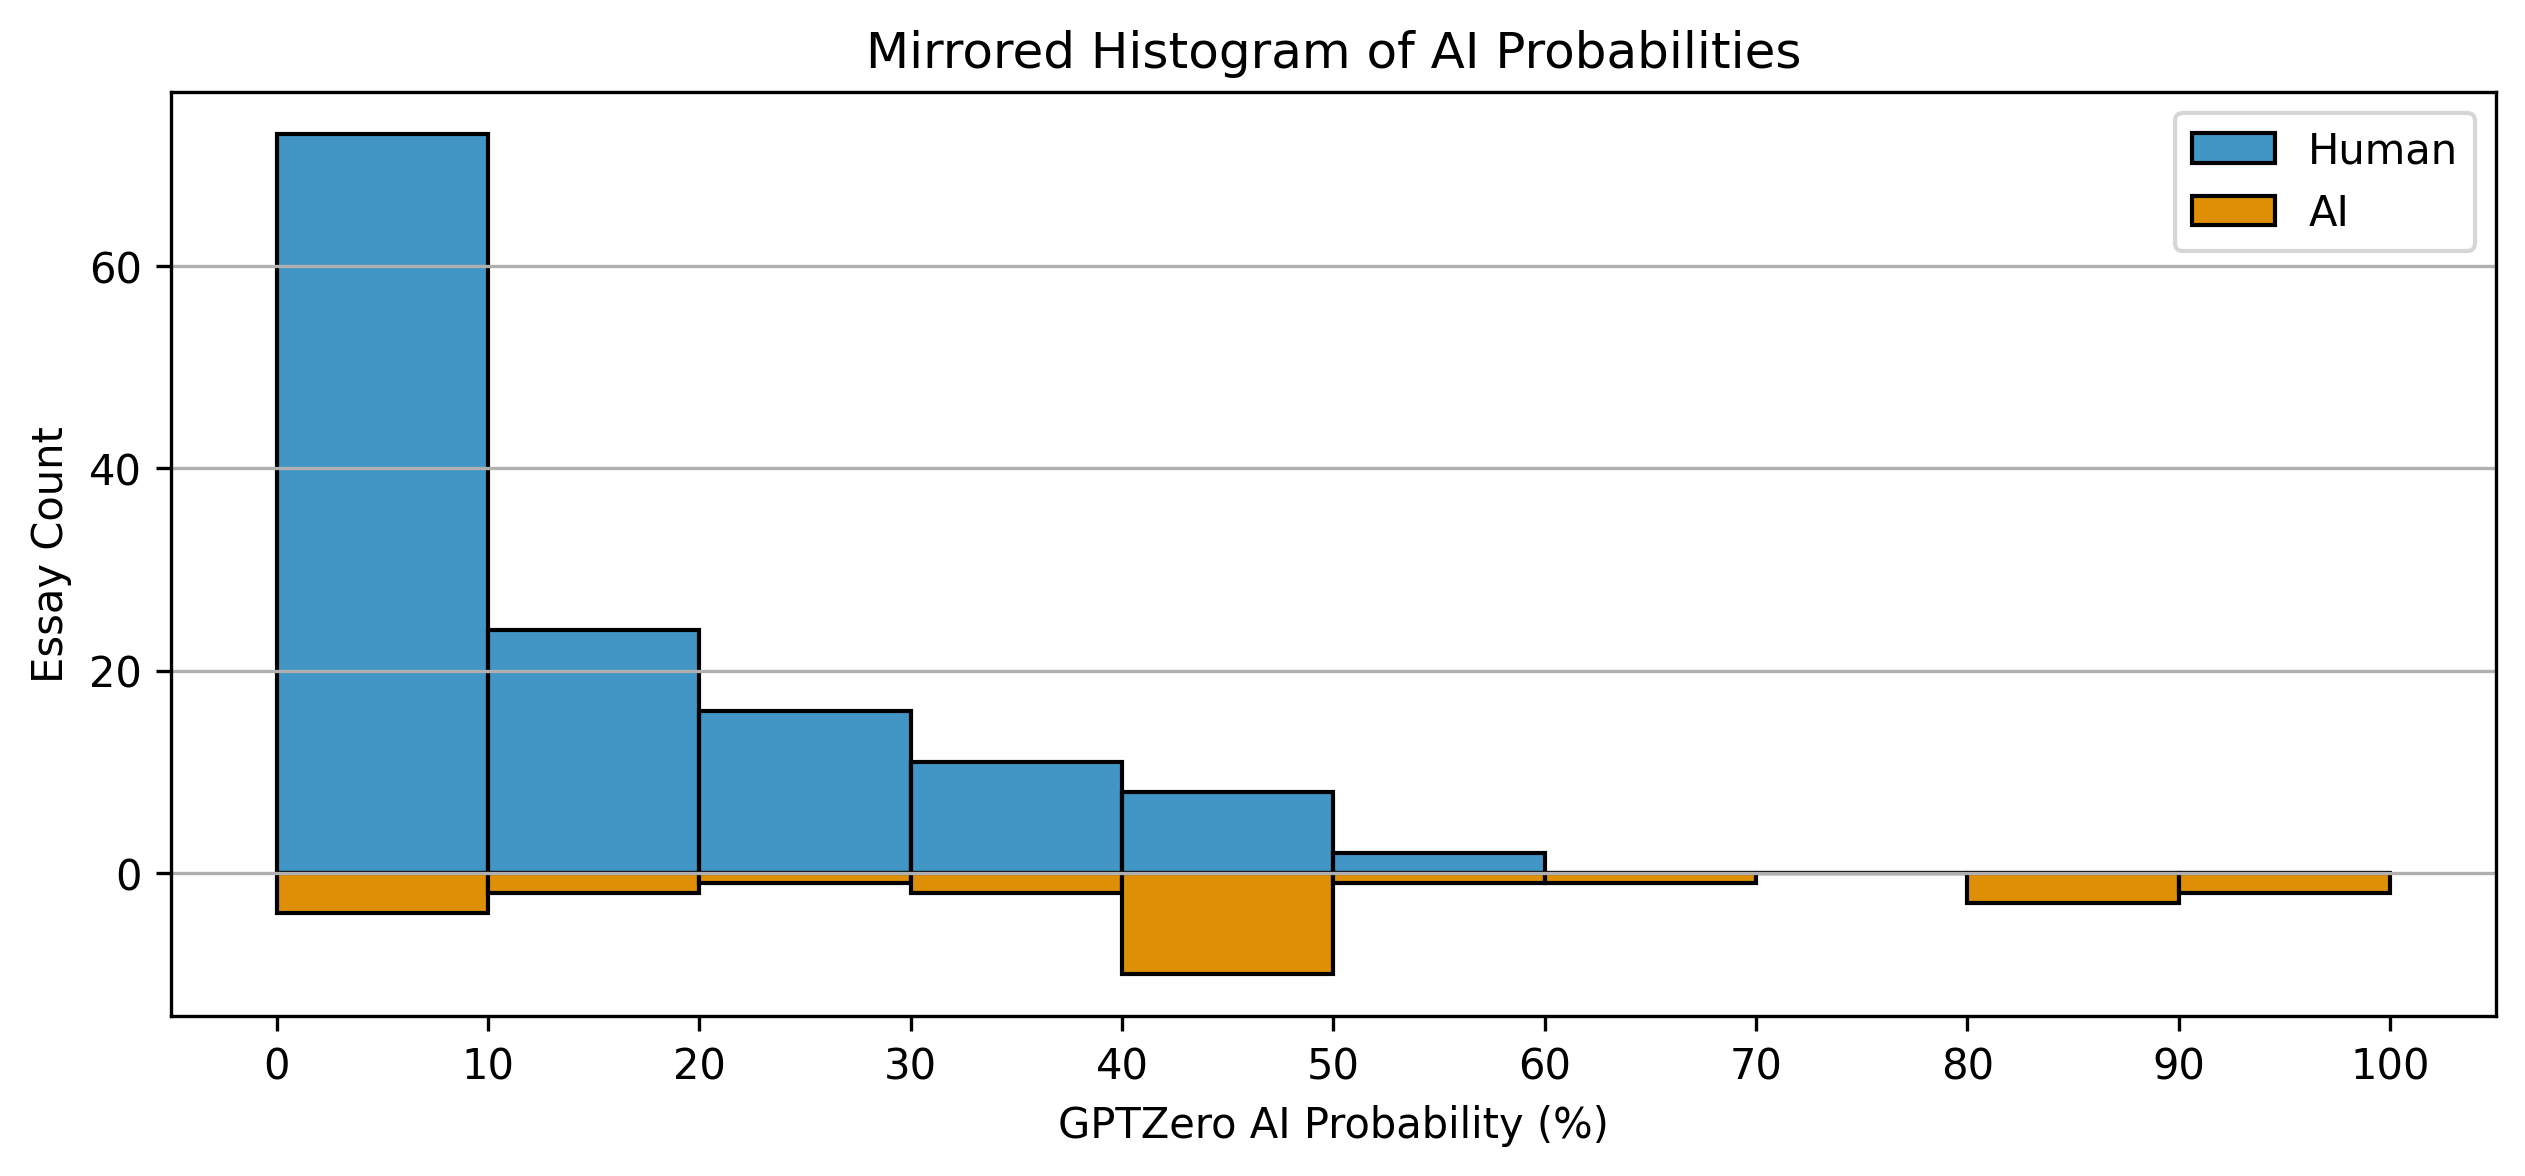

In [7]:
# Based on: https://python-graph-gallery.com/density-mirror/
# Adjusting the colors of the histogram to use standard seaborn colors for consistency
df = pd.read_csv(file_path)
# Setting figure size
plt.figure(figsize=(10, 4))
human_data = df[df['AI/Human'] == 'Human']['AI Probability (%)']
ai_data = df[df['AI/Human'] == 'AI']['AI Probability (%)']
n_bins = 10

# Default seaborn color palette
sns_color_palette = sns.color_palette("colorblind")

# Plotting histogram for 'Human' category with standard seaborn blue color
sns.histplot(human_data, bins=n_bins, binrange=(0, 100), kde=False, color=sns_color_palette[0], edgecolor='black', label='Human')

# Plotting mirrored histogram for 'AI' category with standard seaborn orange color
# Re-calculating the histogram for 'AI' data
heights, bins = np.histogram(ai_data, bins=n_bins, range=(0, 100))
heights *= -1  # Multiplying by -1 to reverse the histogram
bin_width = np.diff(bins)[0]
bin_pos = bins[:-1] + bin_width / 2

plt.bar(bin_pos, heights, width=bin_width, color=sns_color_palette[1], edgecolor='black', label='AI')

# Adding titles, labels, and grid
plt.title('Mirrored Histogram of AI Probabilities')
plt.xlabel('GPTZero AI Probability (%)')
plt.ylabel('Essay Count')
plt.xticks(range(0, 101, n_bins))  # Setting x-axis ticks to represent each 10% interval
plt.grid(axis='y')
plt.legend()

# Showing the plot
plt.show()

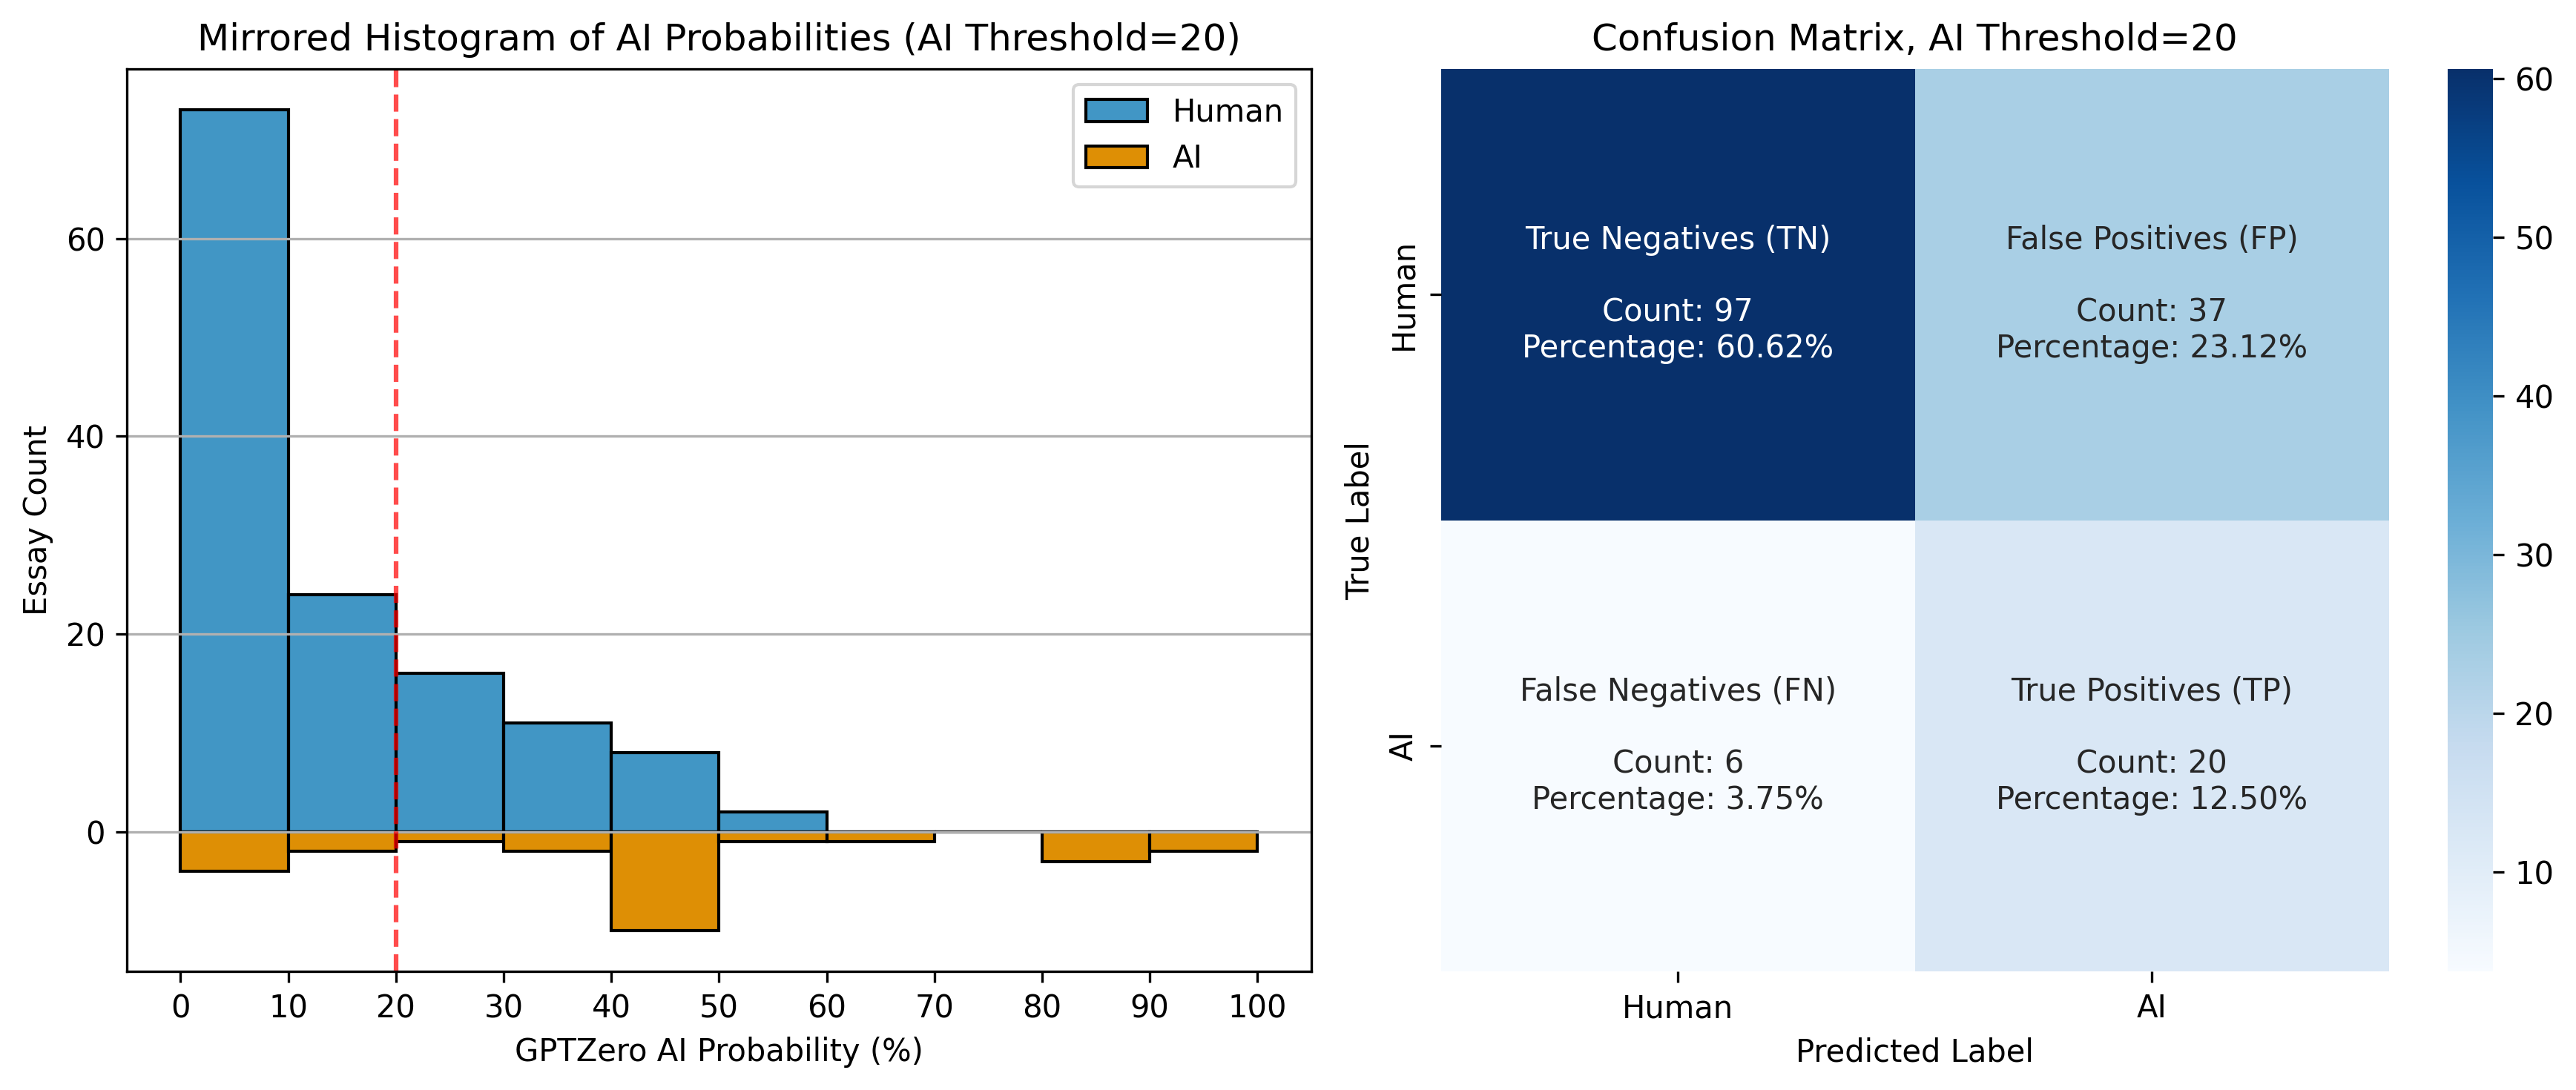

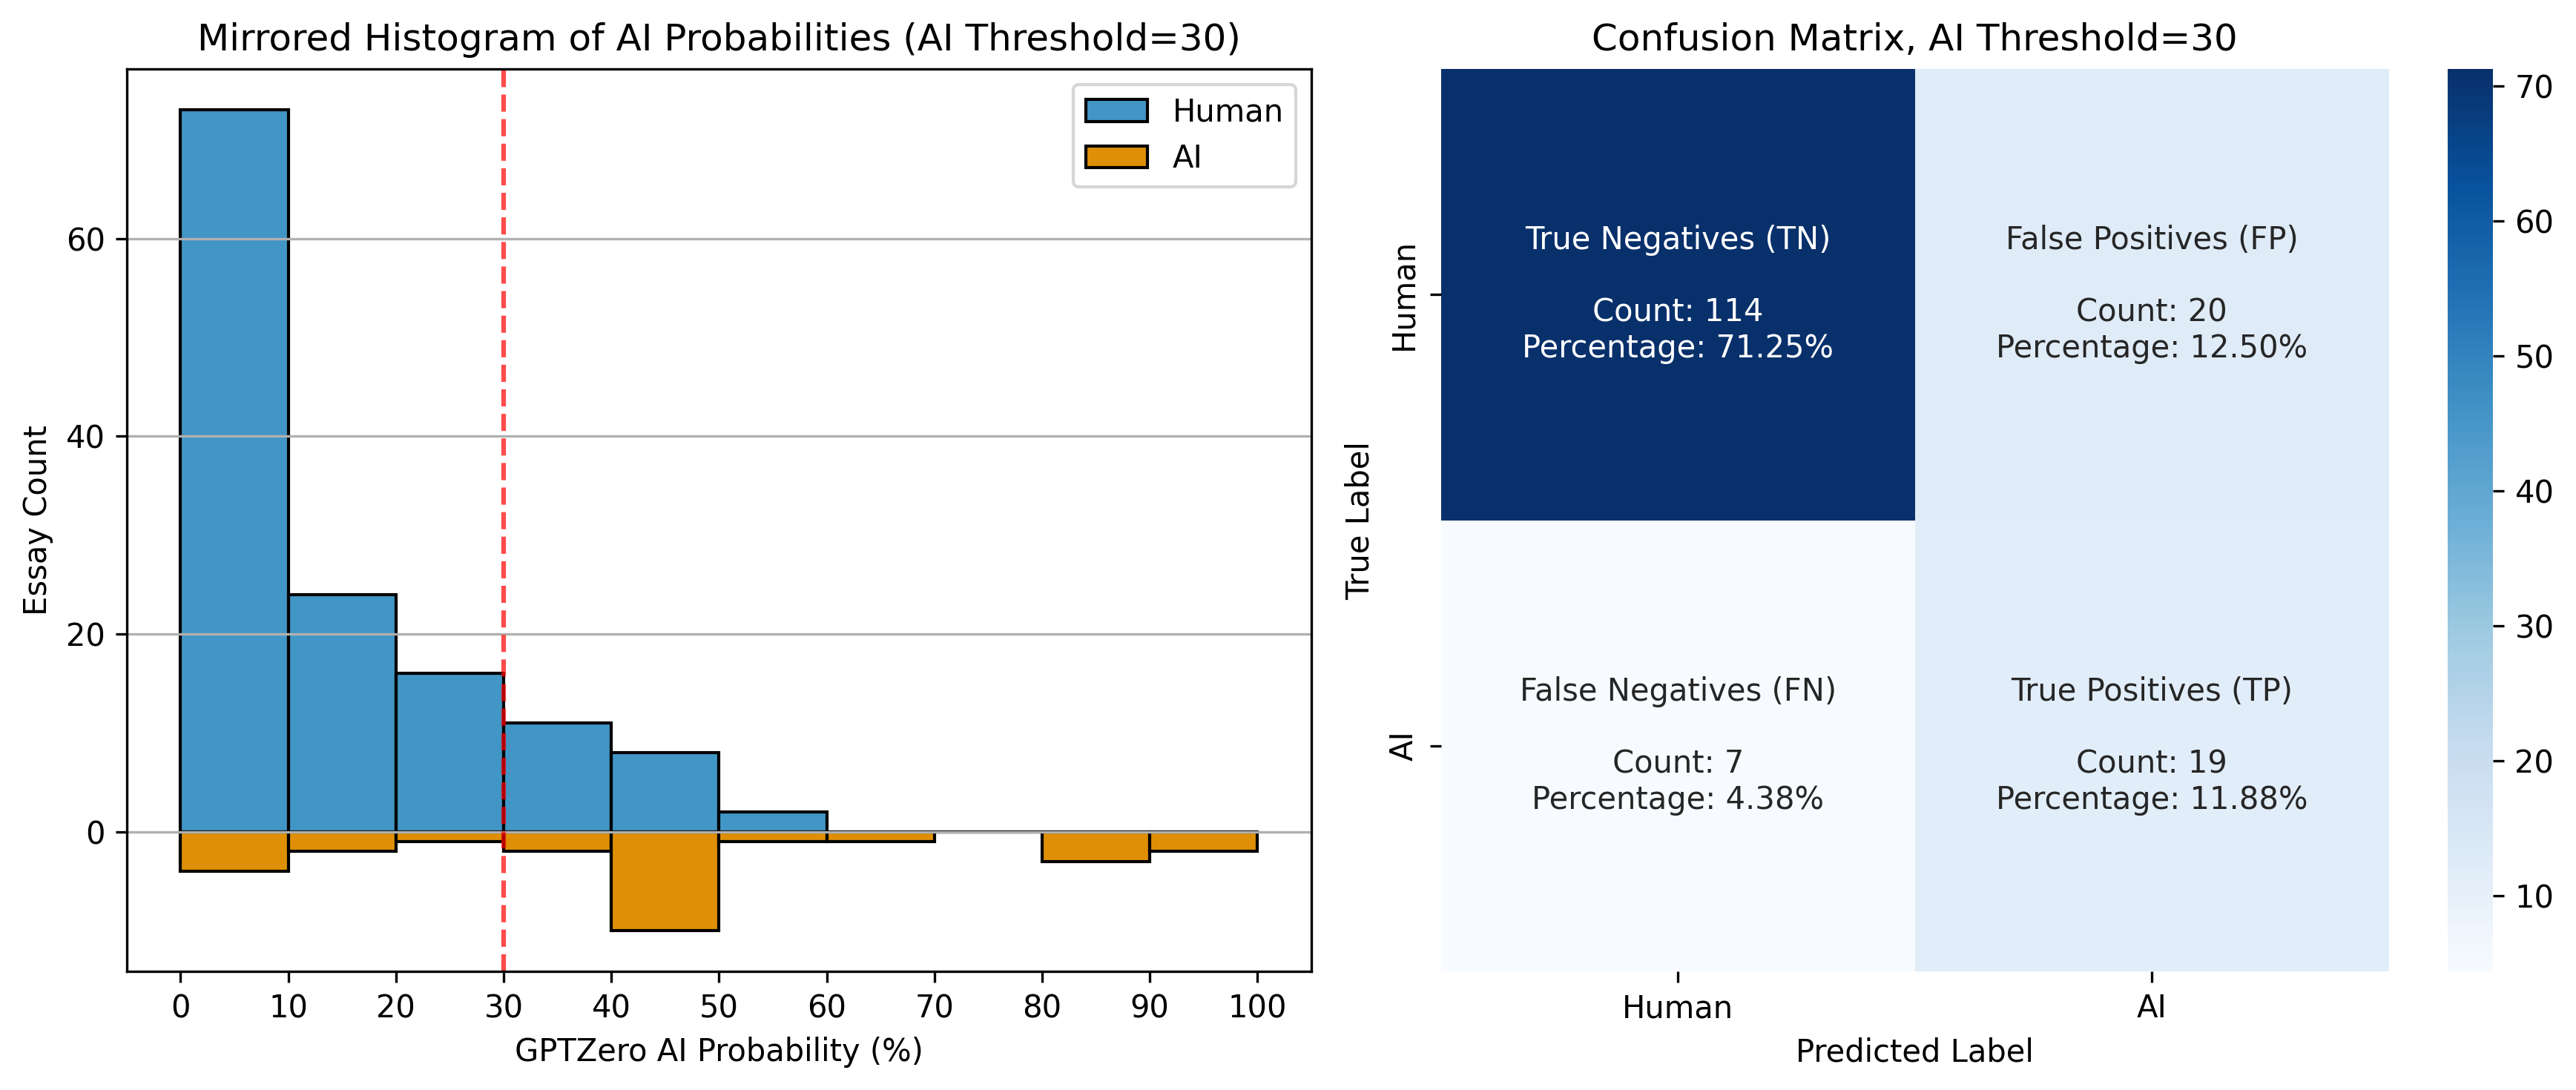

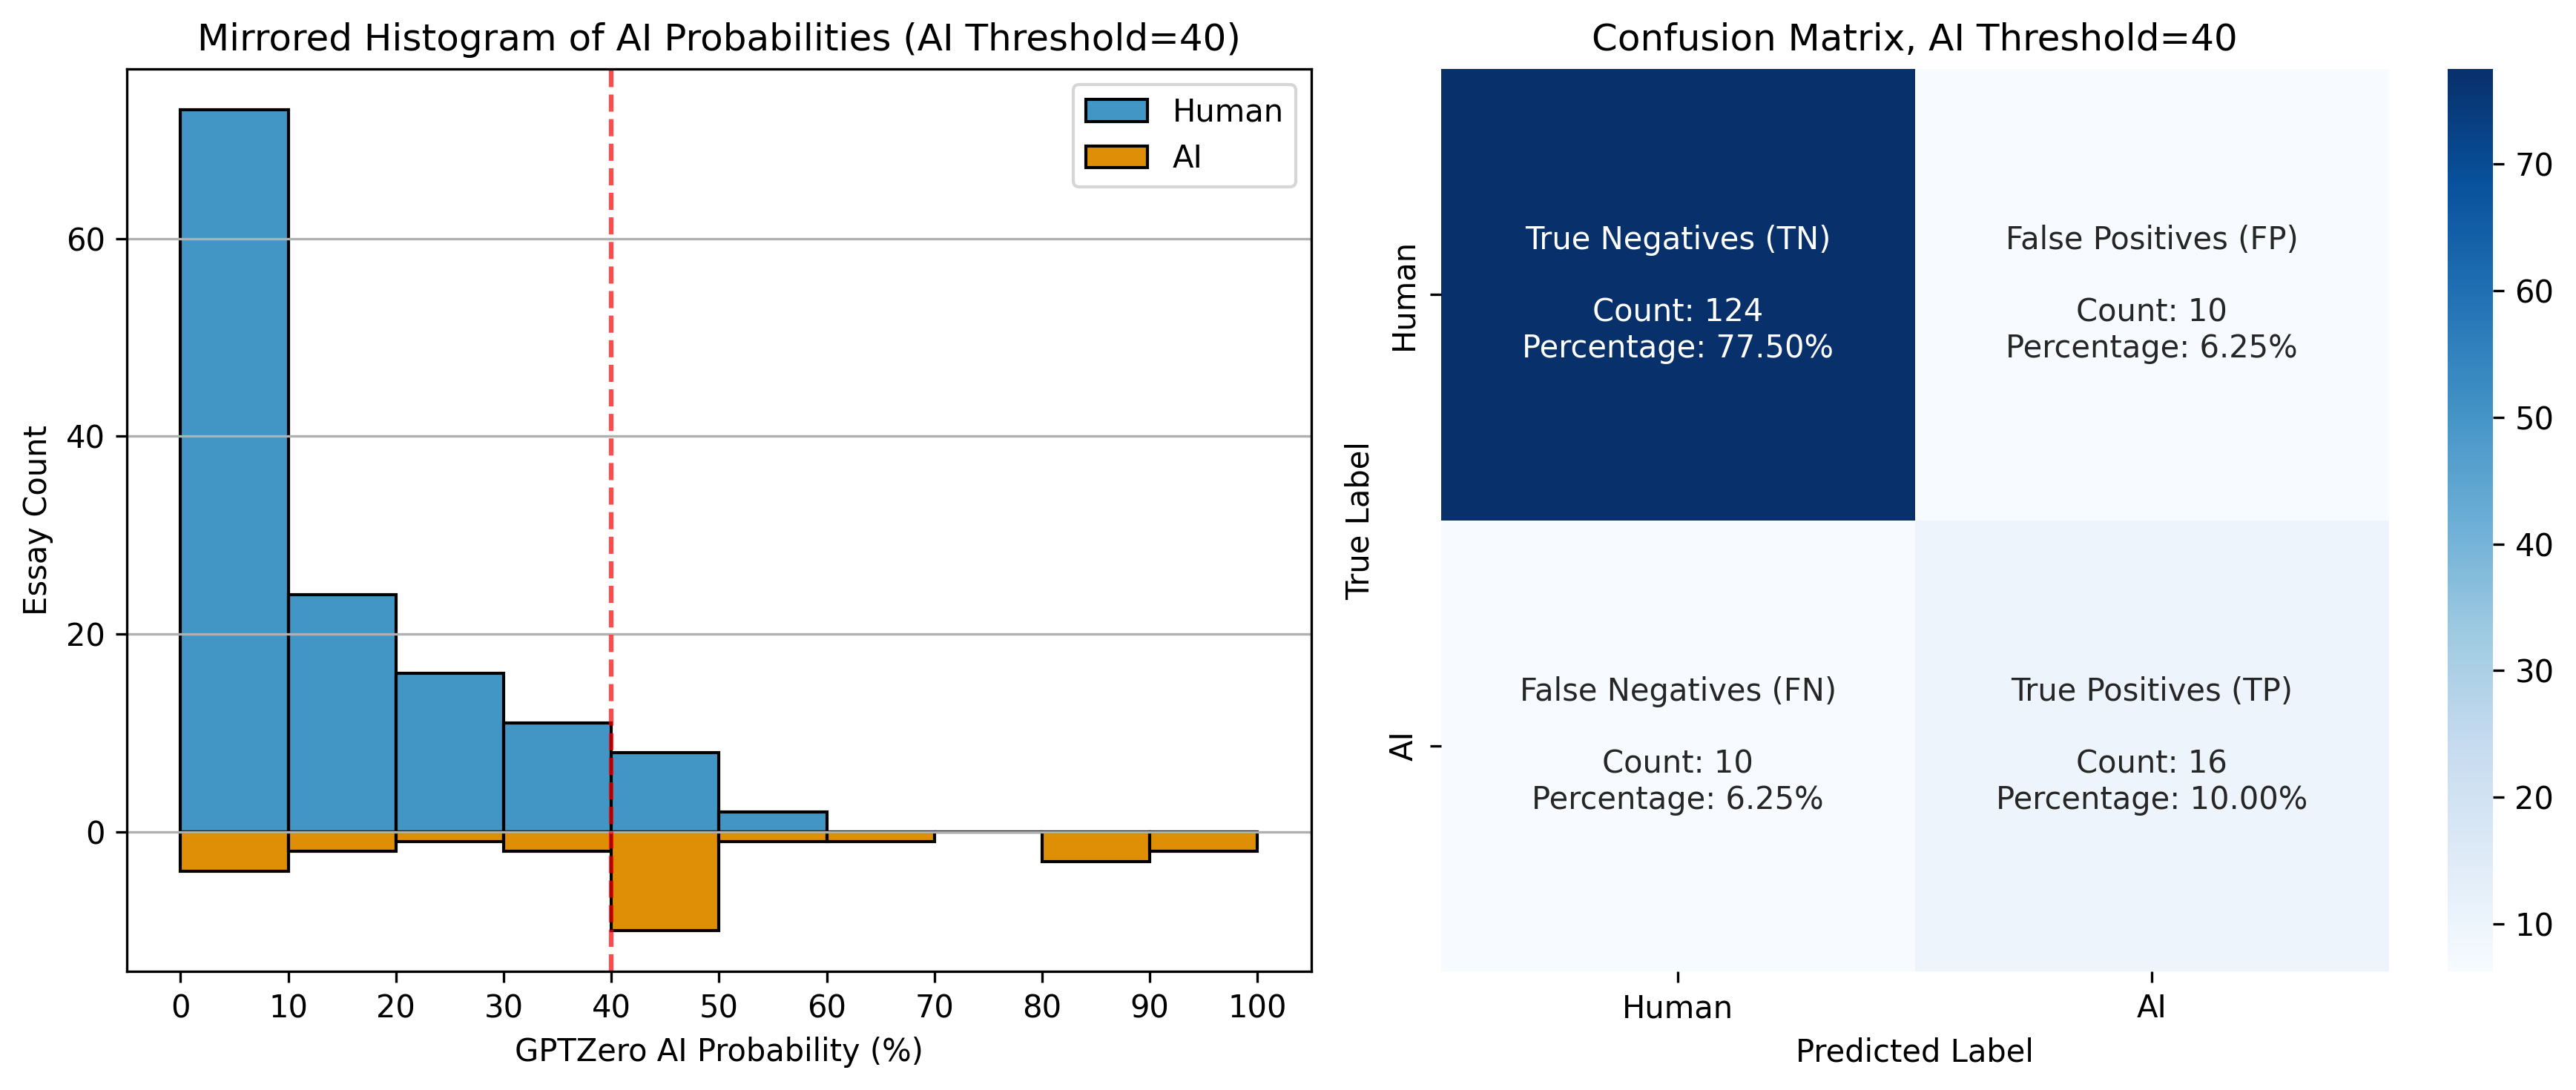

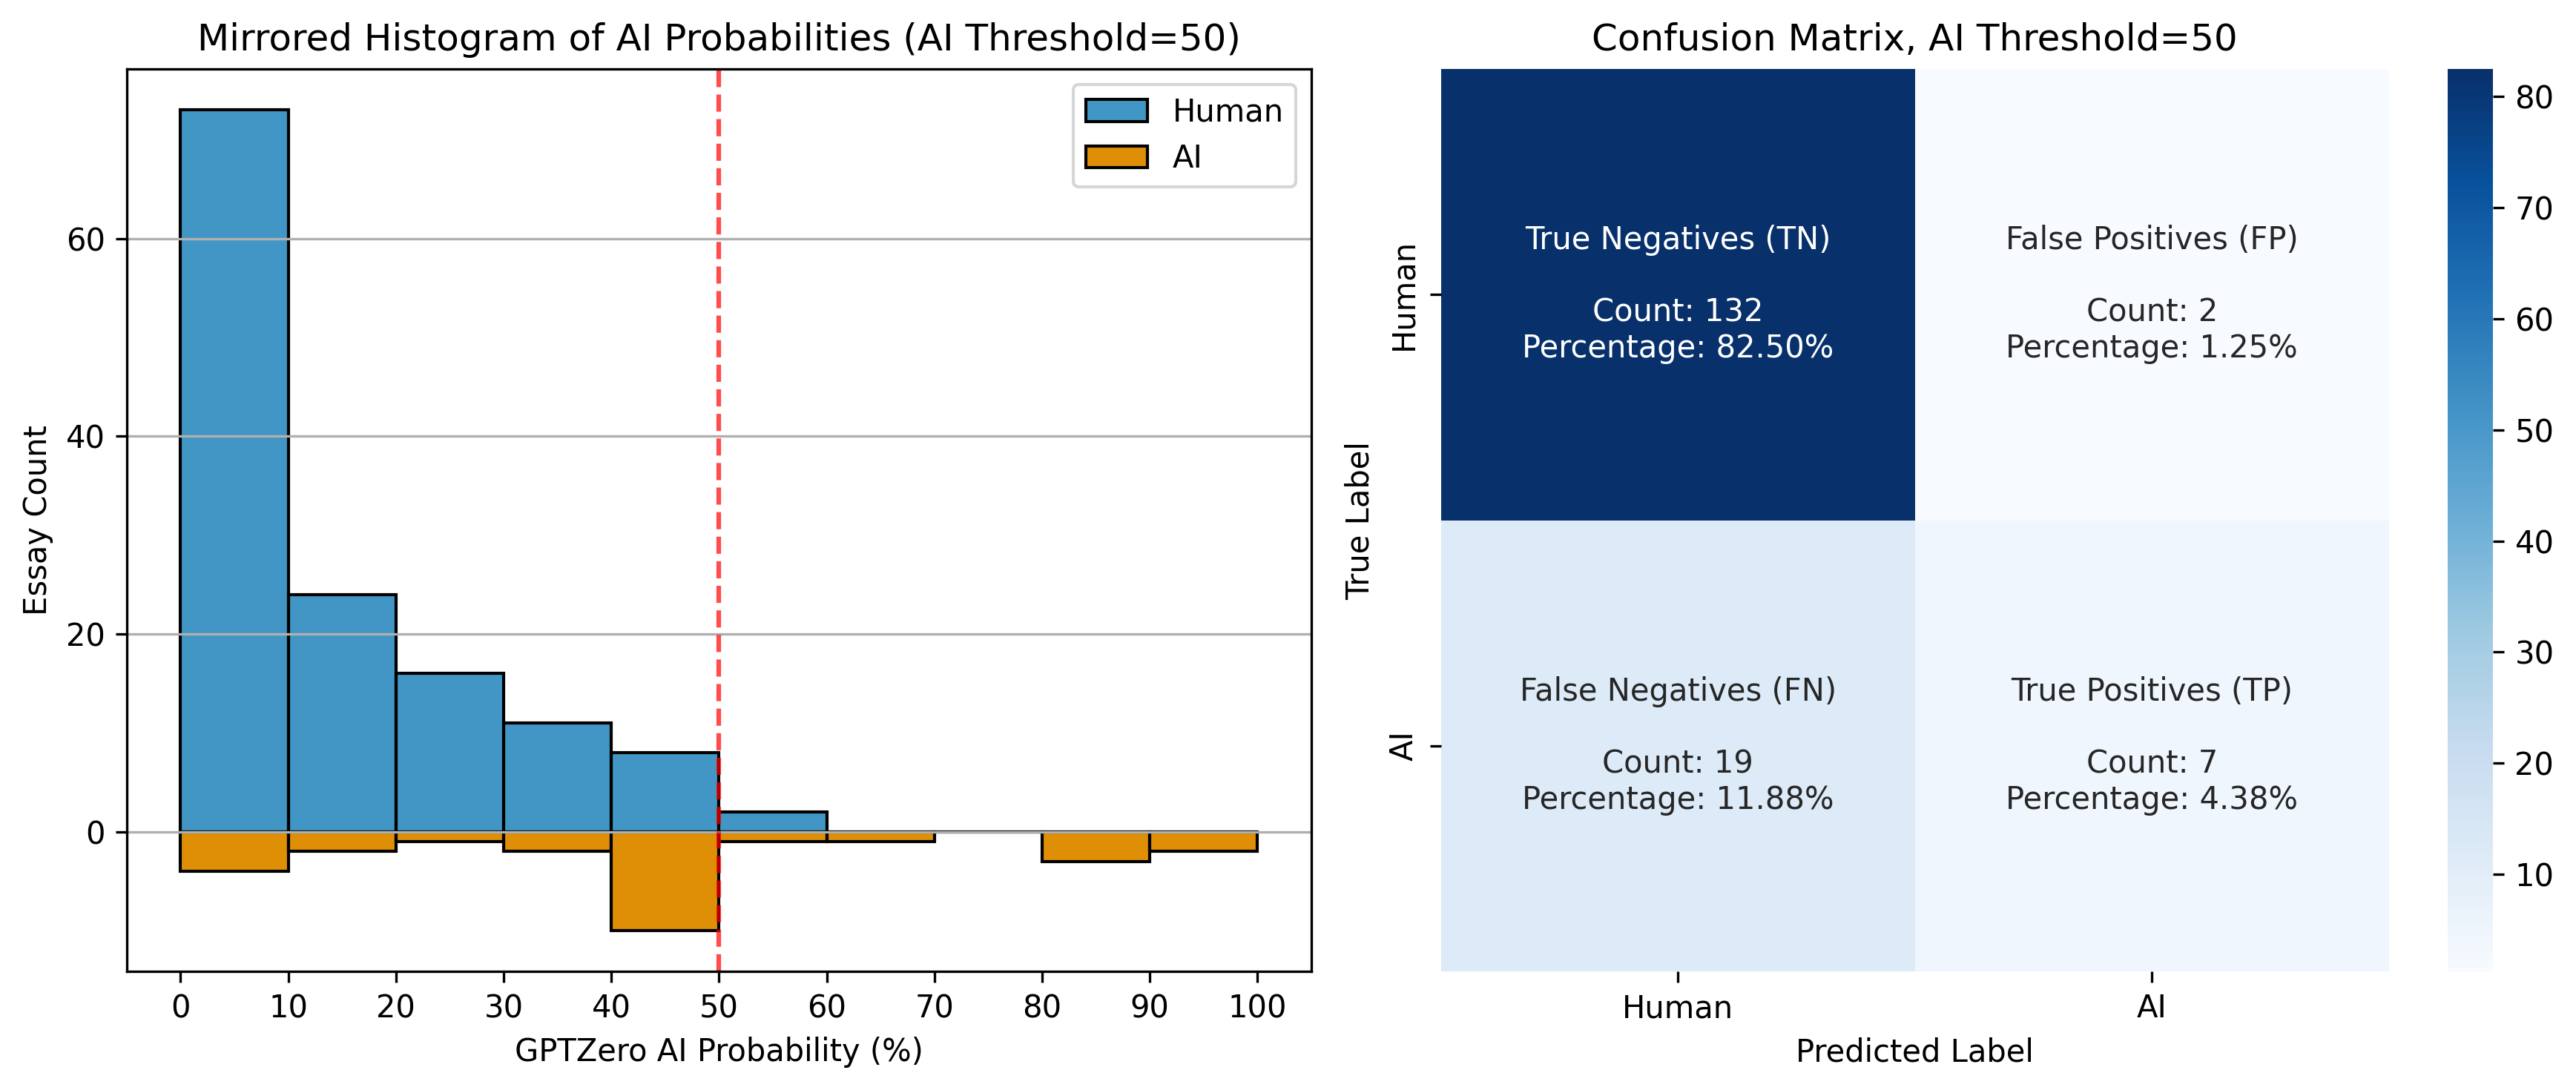

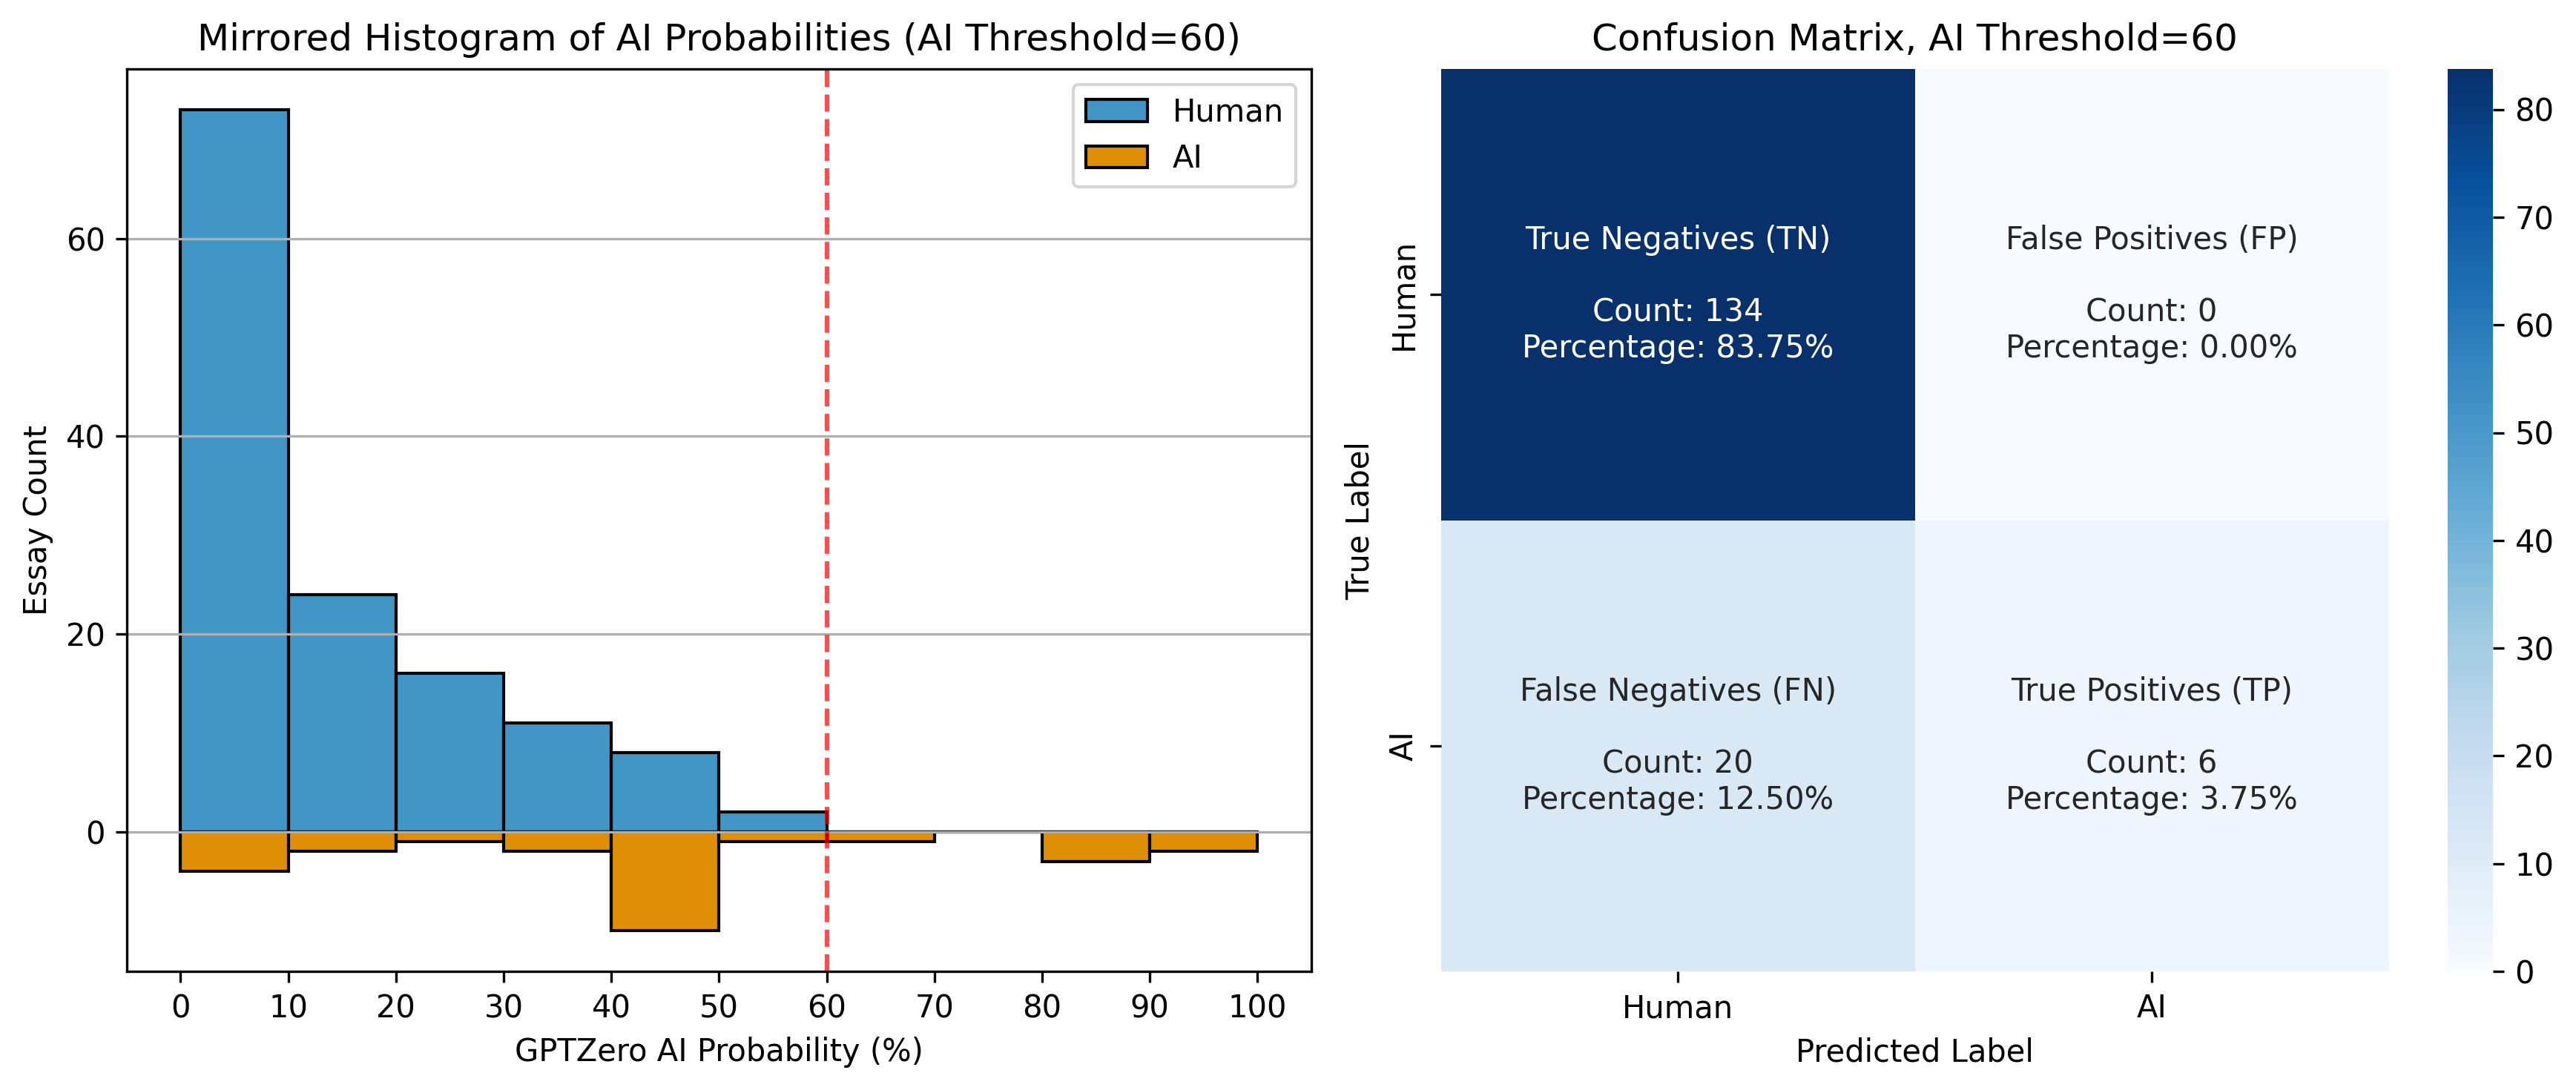

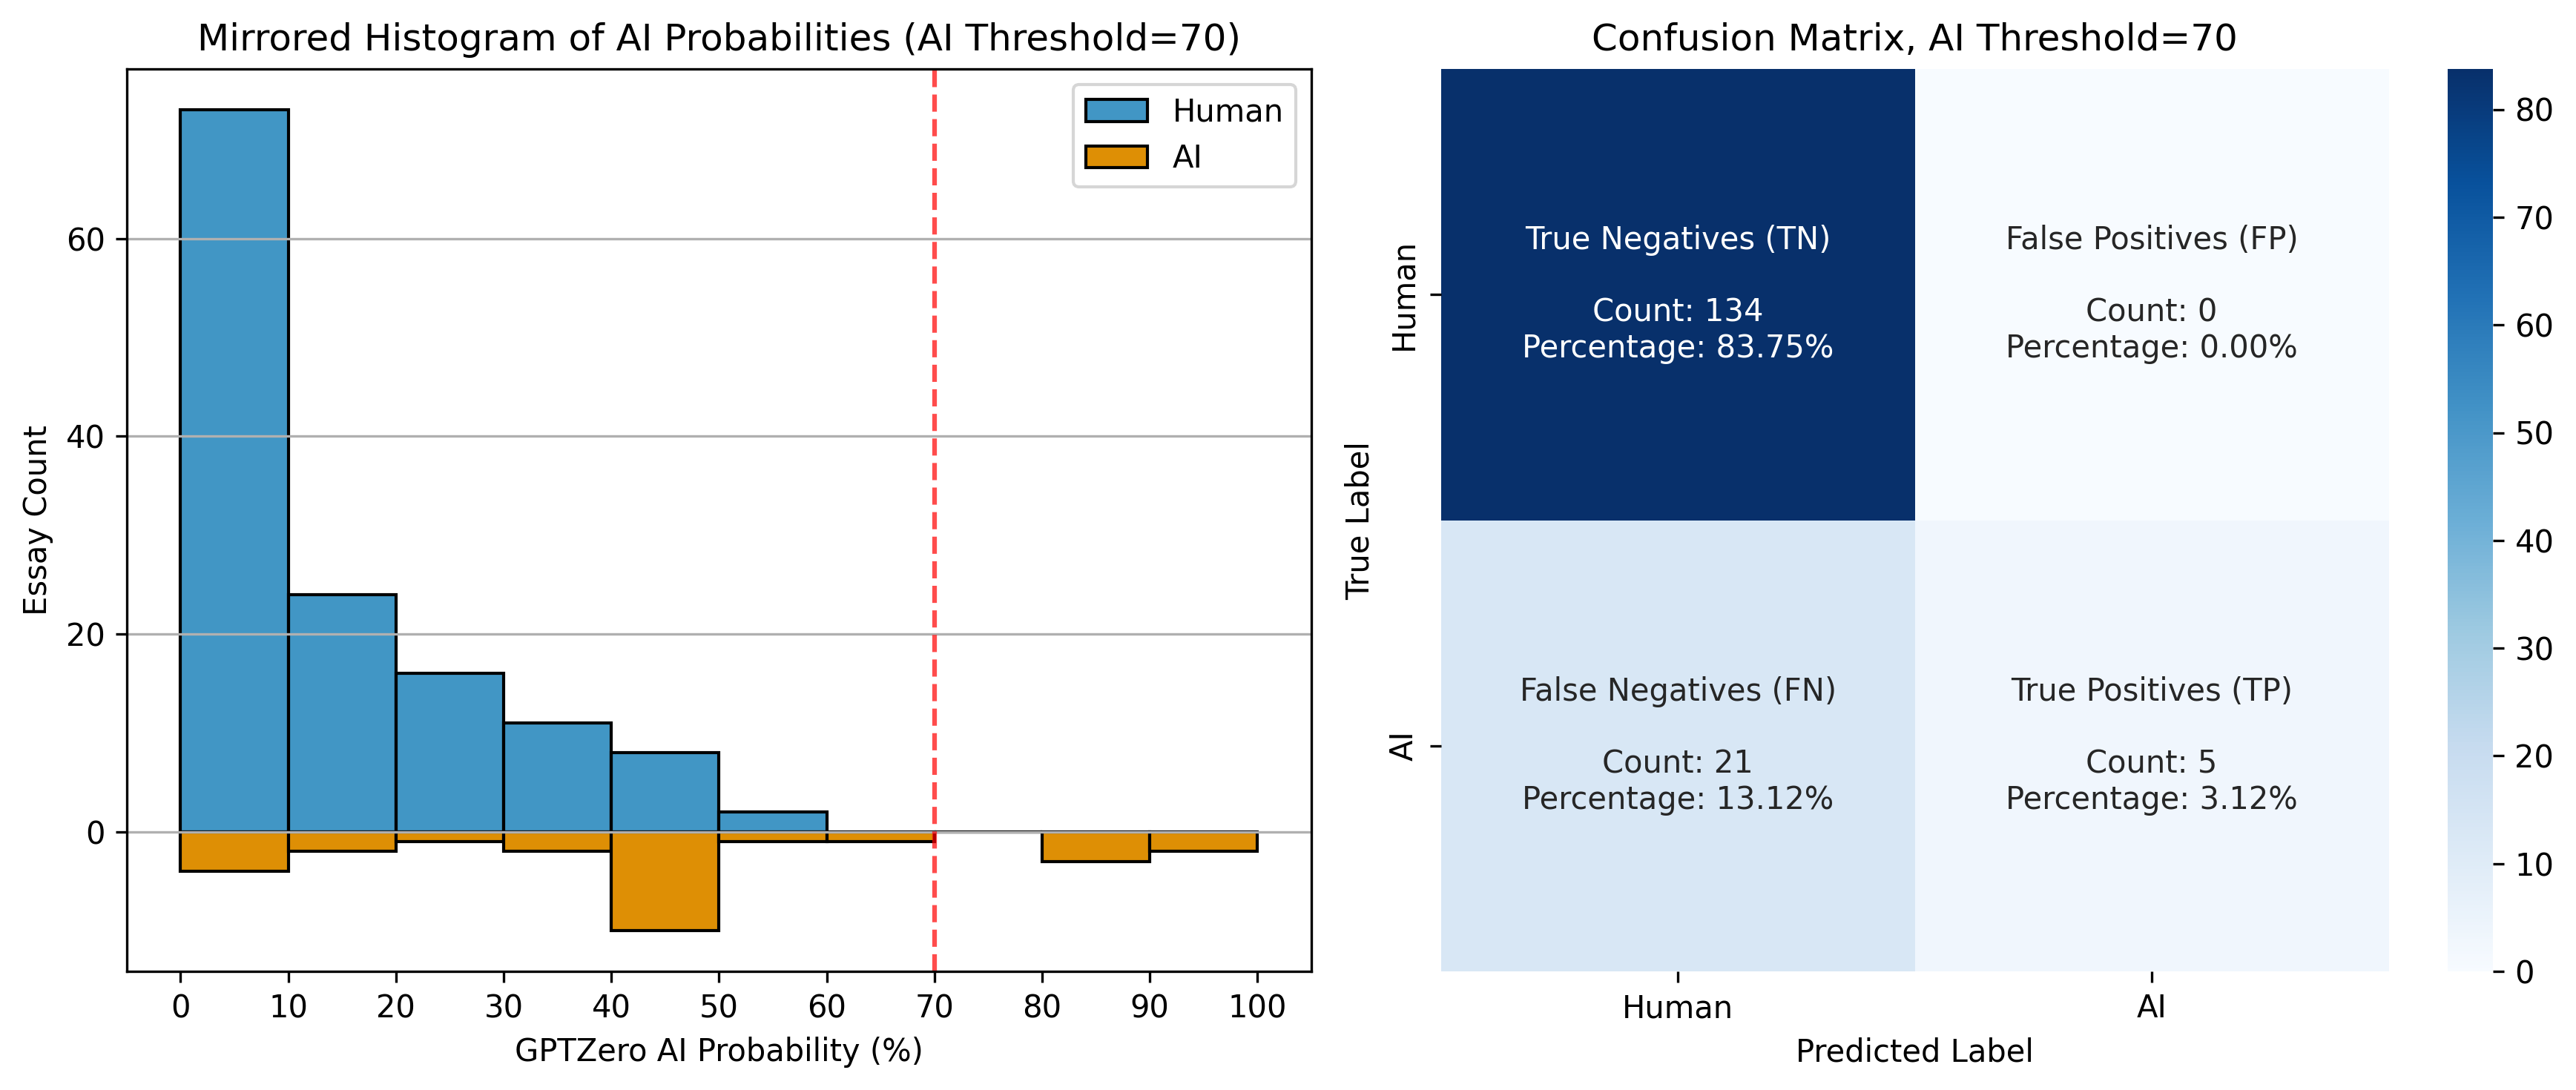

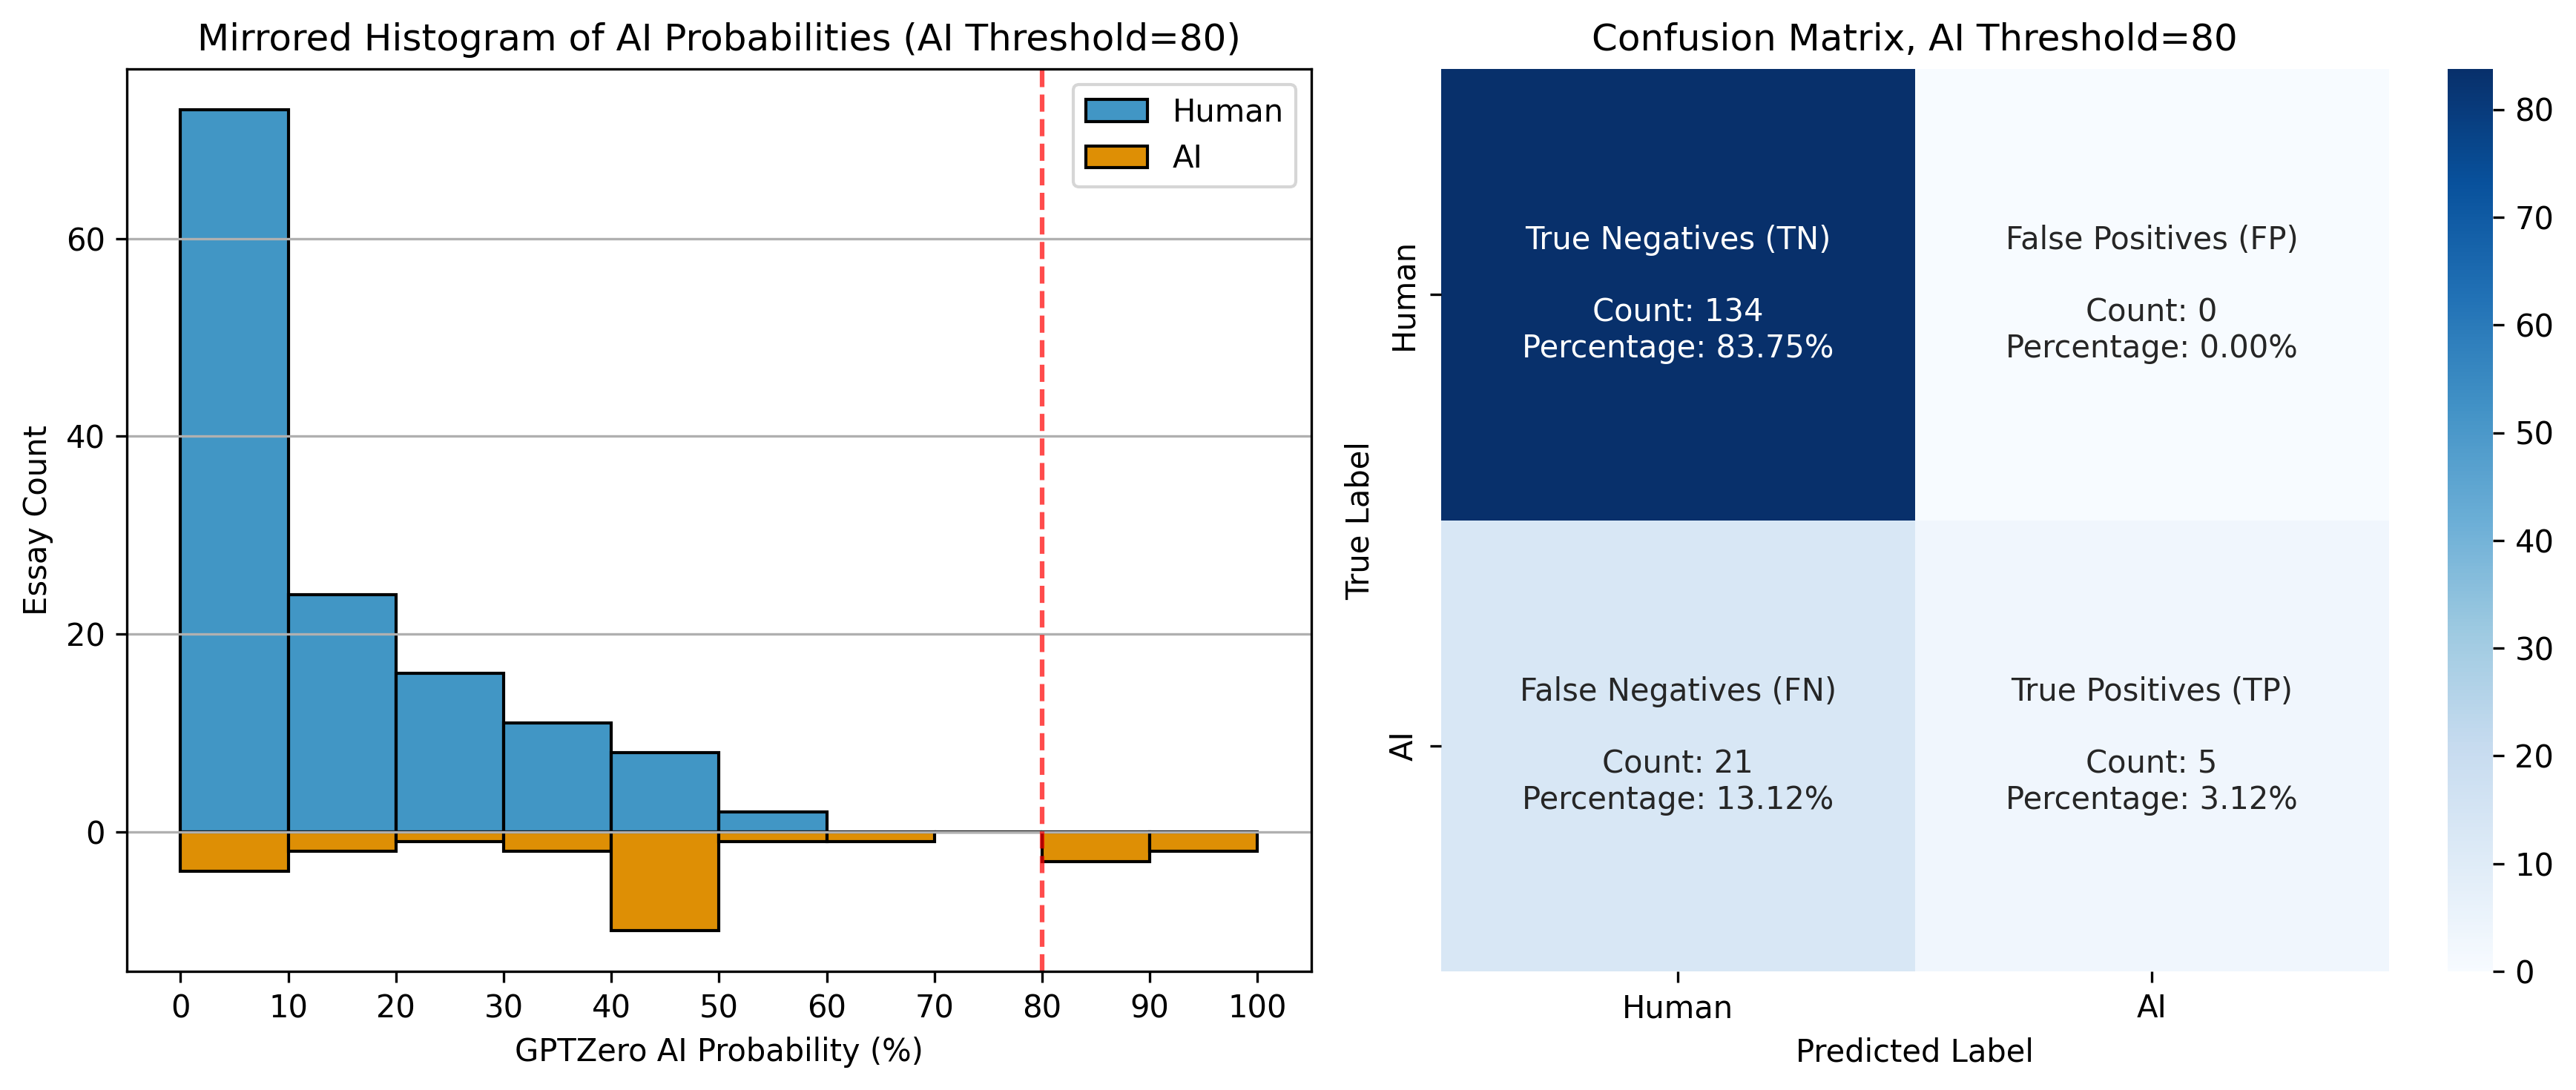

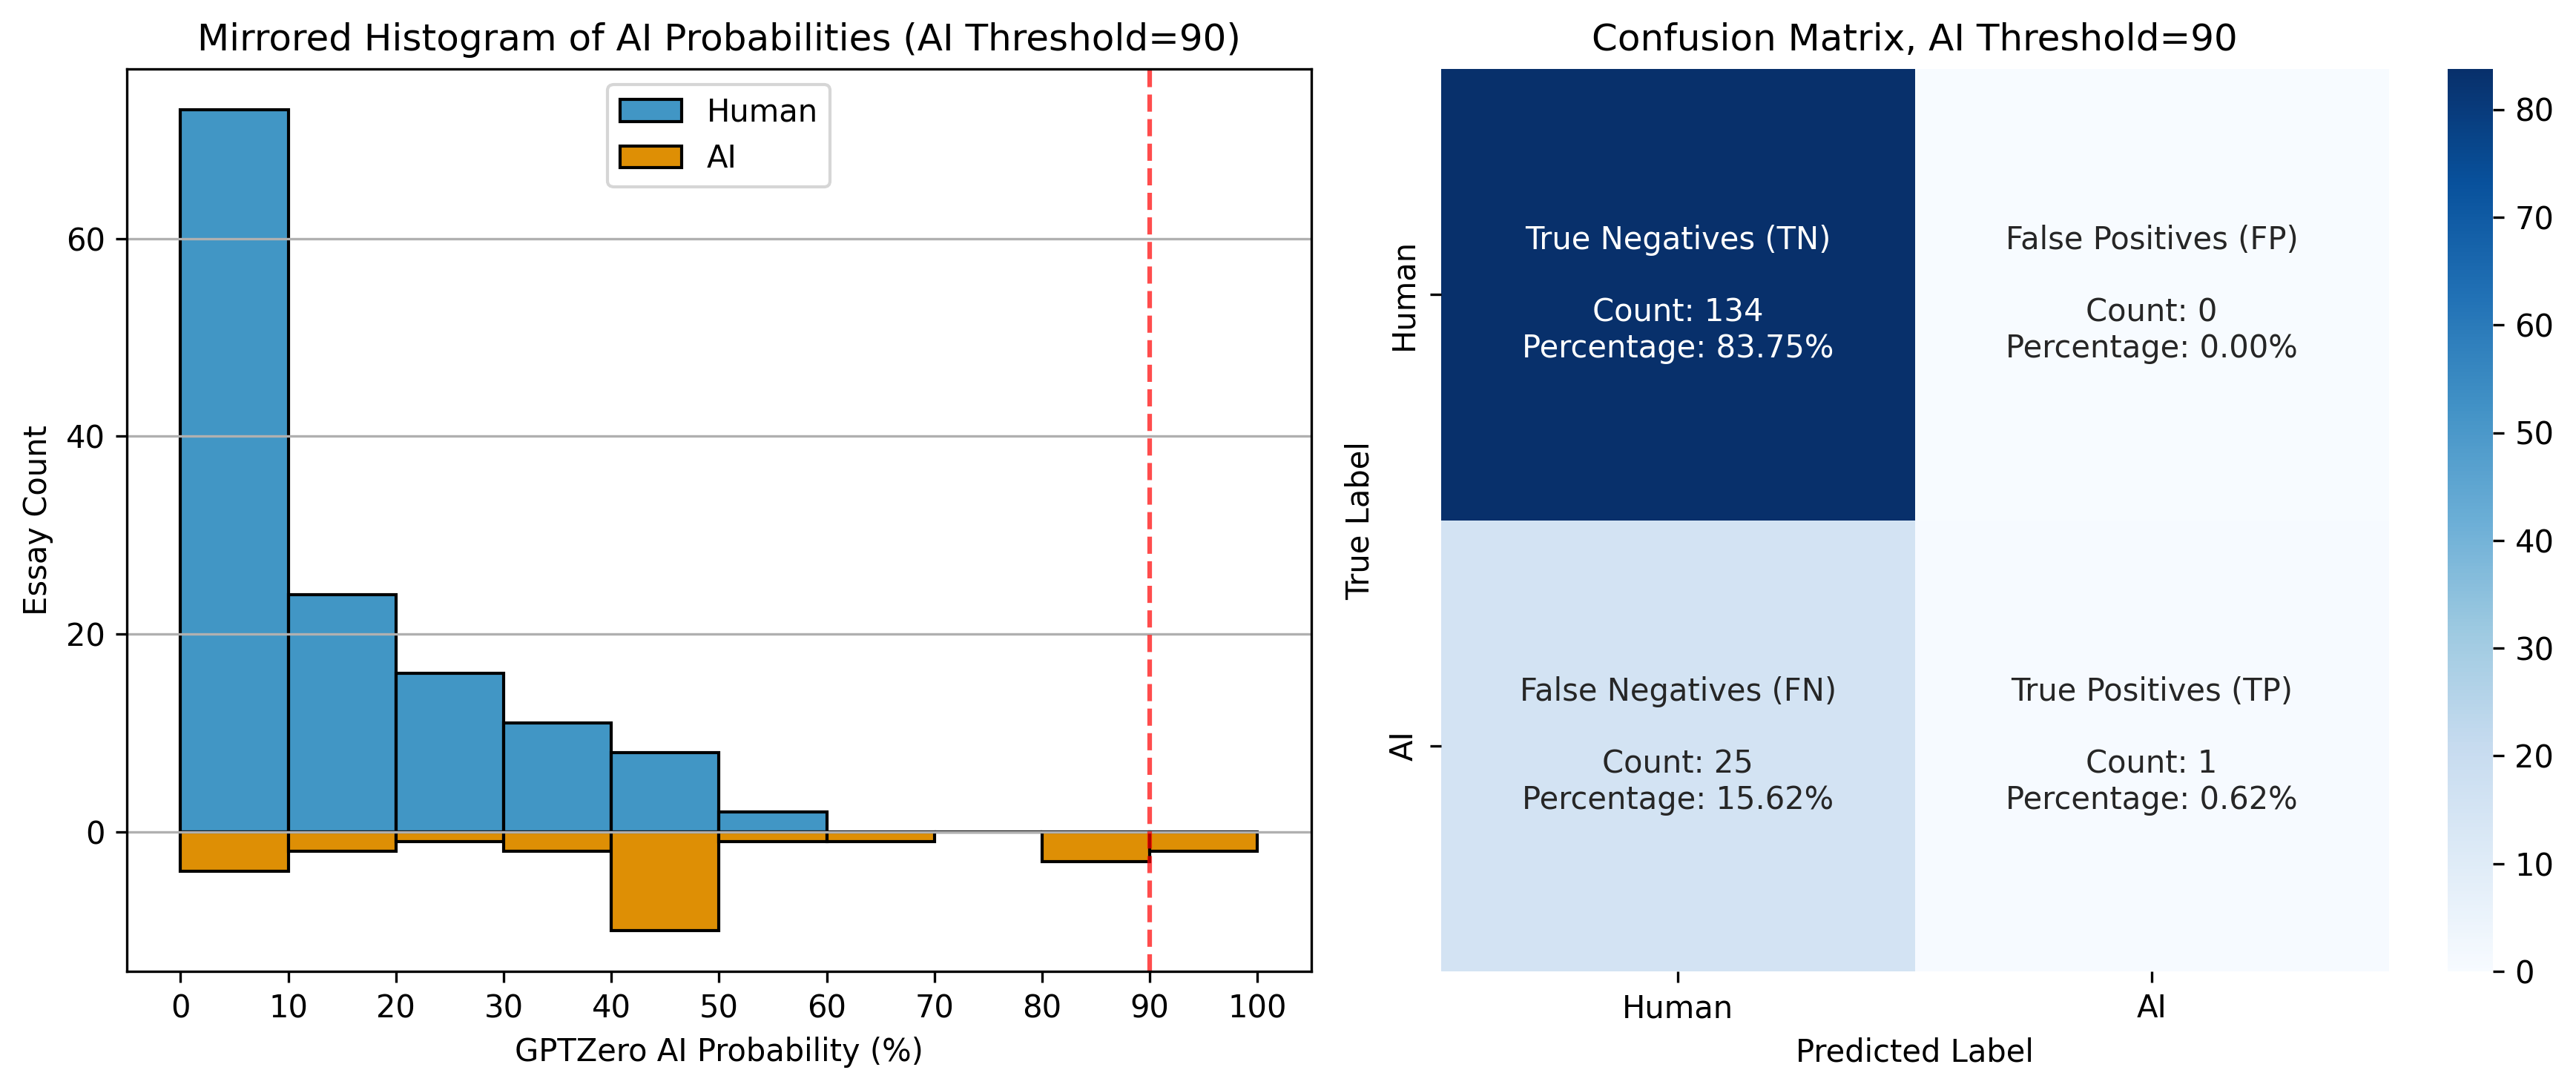

In [8]:
def plot_all_thresholds(file_path):
  df = pd.read_csv(file_path)

  # Prepare data for the mirrored histogram
  human_data = df[df['AI/Human'] == 'Human']['AI Probability (%)']
  ai_data = df[df['AI/Human'] == 'AI']['AI Probability (%)']
  n_bins = 10

  # Loop over different AI_THRESHOLD values
  for AI_THRESHOLD in range(20, 91, 10):
      # Setting figure size for each combined plot
      plt.figure(figsize=(12, 5))

      # Plotting the mirrored histogram in the first subplot
      plt.subplot(1, 2, 1)
      sns.histplot(human_data, bins=n_bins, binrange=(0, 100), kde=False, color=sns.color_palette("colorblind")[0], edgecolor='black', label='Human')
      heights, bins = np.histogram(ai_data, bins=n_bins, range=(0, 100))
      heights *= -1  # Mirroring
      bin_width = np.diff(bins)[0]
      bin_pos = bins[:-1] + bin_width / 2
      plt.bar(bin_pos, heights, width=bin_width, color=sns.color_palette("colorblind")[1], edgecolor='black', label='AI')
      plt.title(f'Mirrored Histogram of AI Probabilities (AI Threshold={AI_THRESHOLD})')
      plt.xlabel('GPTZero AI Probability (%)')
      plt.ylabel('Essay Count')
      plt.xticks(range(0, 101, 10))
      plt.grid(axis='y')
      plt.legend()

      # Drawing and labeling the vertical line for the current AI_THRESHOLD value
      plt.axvline(x=AI_THRESHOLD, color='red', linestyle='--', alpha=0.7)

      # Plotting the confusion matrix in the second subplot
      plt.subplot(1, 2, 2)
      df['Predicted'] = df['AI Probability (%)'].apply(lambda x: 'AI' if x > AI_THRESHOLD else 'Human')
      cm = confusion_matrix(df['AI/Human'], df['Predicted'], labels=["Human", "AI"])
      cm_percentage = cm / cm.sum() * 100
      labels = np.array([["True Negatives (TN)", "False Positives (FP)"],
                        ["False Negatives (FN)", "True Positives (TP)"]])
      labels_with_counts = (np.array(["{}\n\nCount: {}\nPercentage: {:.2f}%".format(text, count, percentage)
                                      for text, count, percentage in zip(labels.flatten(), cm.flatten(), cm_percentage.flatten())])
                            ).reshape(2, 2)
      sns.heatmap(cm_percentage, annot=labels_with_counts, fmt='', cmap='Blues', xticklabels=["Human", "AI"], yticklabels=["Human", "AI"])
      plt.title(f'Confusion Matrix, AI Threshold={AI_THRESHOLD}')
      plt.ylabel('True Label')
      plt.xlabel('Predicted Label')

      # Adjust layout and show the combined plot
      plt.tight_layout()
      plt.show()

plot_all_thresholds(file_path)

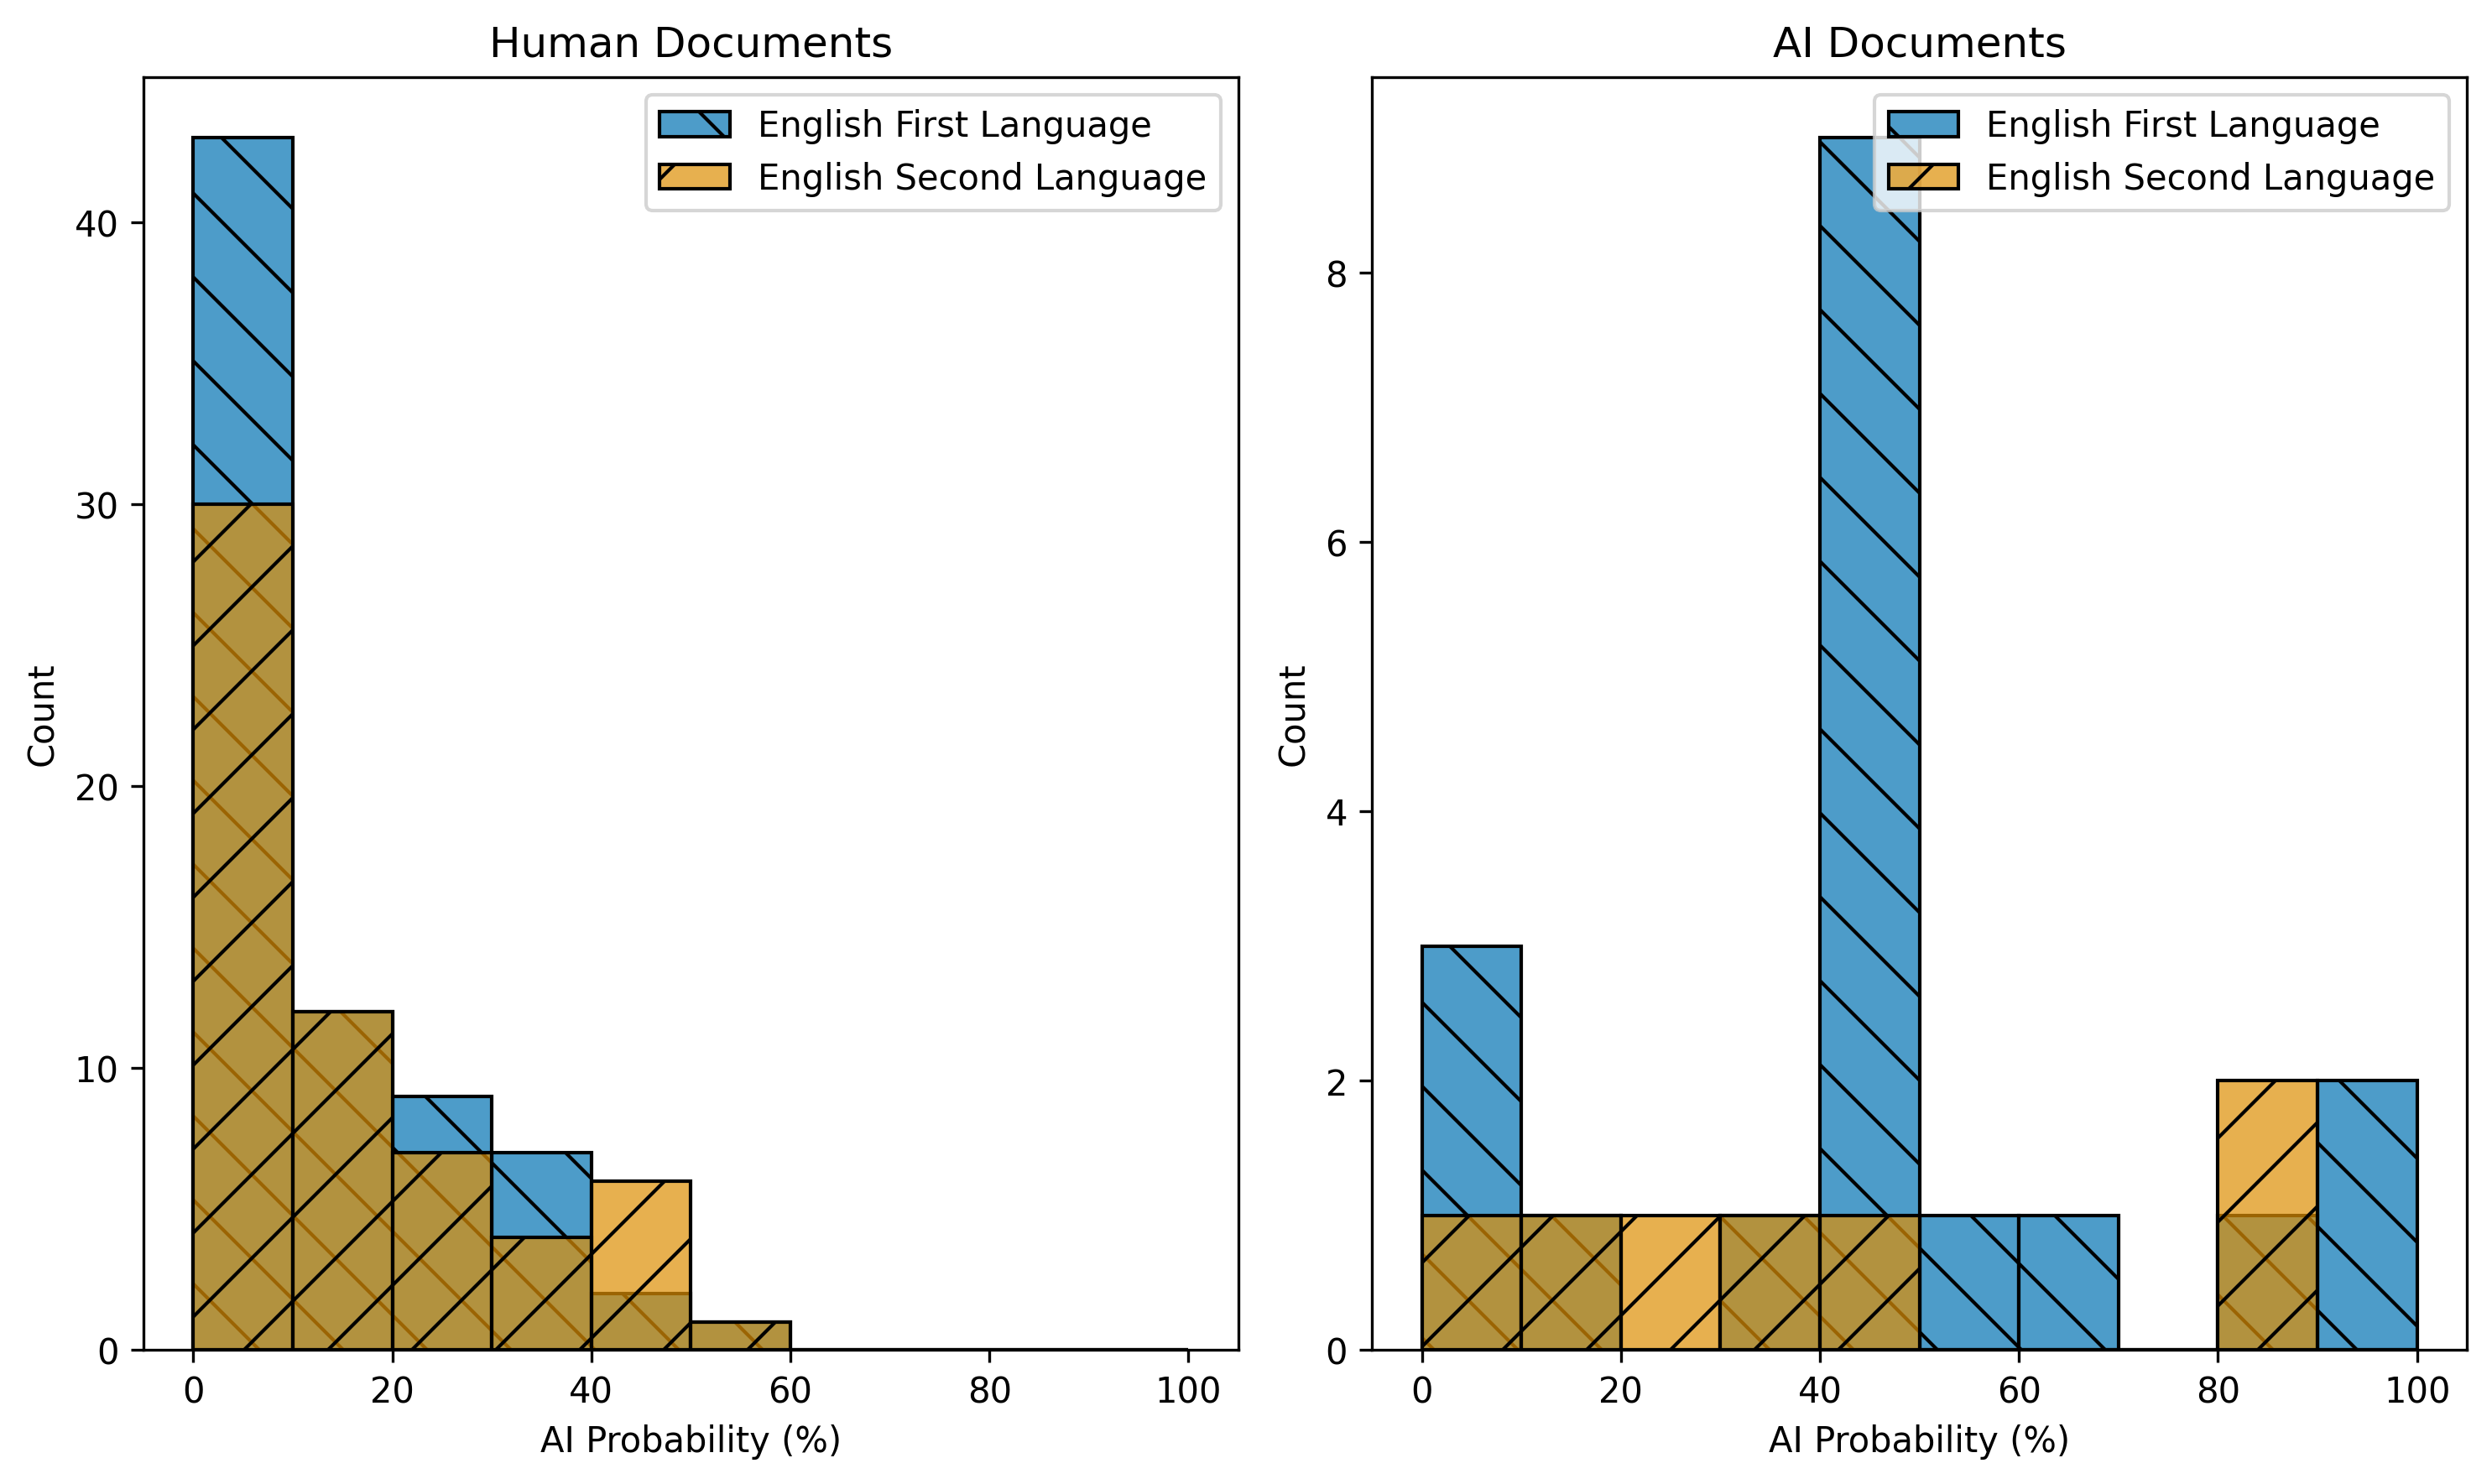

In [9]:
def esl_compare(file_path):
  # Load the dataset from the CSV file
  df = pd.read_csv(file_path)

  # Filtering data based on AI/Human classification
  human_docs = df[df['AI/Human'] == 'Human']
  ai_docs = df[df['AI/Human'] == 'AI']

  # Preparing data for ESL and non-ESL for both human and AI documents
  esl_human = human_docs[human_docs['Is English your first language?'] == 'No']['AI Probability (%)']
  non_esl_human = human_docs[human_docs['Is English your first language?'] == 'Yes']['AI Probability (%)']

  esl_ai = ai_docs[ai_docs['Is English your first language?'] == 'No']['AI Probability (%)']
  non_esl_ai = ai_docs[ai_docs['Is English your first language?'] == 'Yes']['AI Probability (%)']

  # Plot settings
  n_bins = 10
  sns_color_palette = sns.color_palette("colorblind")

  # Setting up the figure for side-by-side plots
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

  # Plotting overlapped histogram for Human Documents
  sns.histplot(non_esl_human, bins=n_bins, binrange=(0, 100), kde=False, color=sns_color_palette[0], label='English First Language', edgecolor='black', alpha=0.7, ax=axes[0], hatch='\\')
  sns.histplot(esl_human, bins=n_bins, binrange=(0, 100), kde=False, color=sns_color_palette[1], label='English Second Language', edgecolor='black', alpha=0.7, ax=axes[0], hatch='/')
  axes[0].set_title('Human Documents')
  axes[0].set_xlabel('AI Probability (%)')
  axes[0].set_ylabel('Count')
  axes[0].legend()

  # Plotting overlapped histogram for AI Documents
  sns.histplot(non_esl_ai, bins=n_bins, binrange=(0, 100), kde=False, color=sns_color_palette[0], label='English First Language', edgecolor='black', alpha=0.7, ax=axes[1], hatch='\\')
  sns.histplot(esl_ai, bins=n_bins, binrange=(0, 100), kde=False, color=sns_color_palette[1], label='English Second Language', edgecolor='black', alpha=0.7, ax=axes[1], hatch='/')
  axes[1].set_title('AI Documents')
  axes[1].set_xlabel('AI Probability (%)')
  axes[1].set_ylabel('Count')
  axes[1].legend()

  # Adjusting layout and showing the figure
  plt.tight_layout()
  plt.show()
esl_compare(file_path)

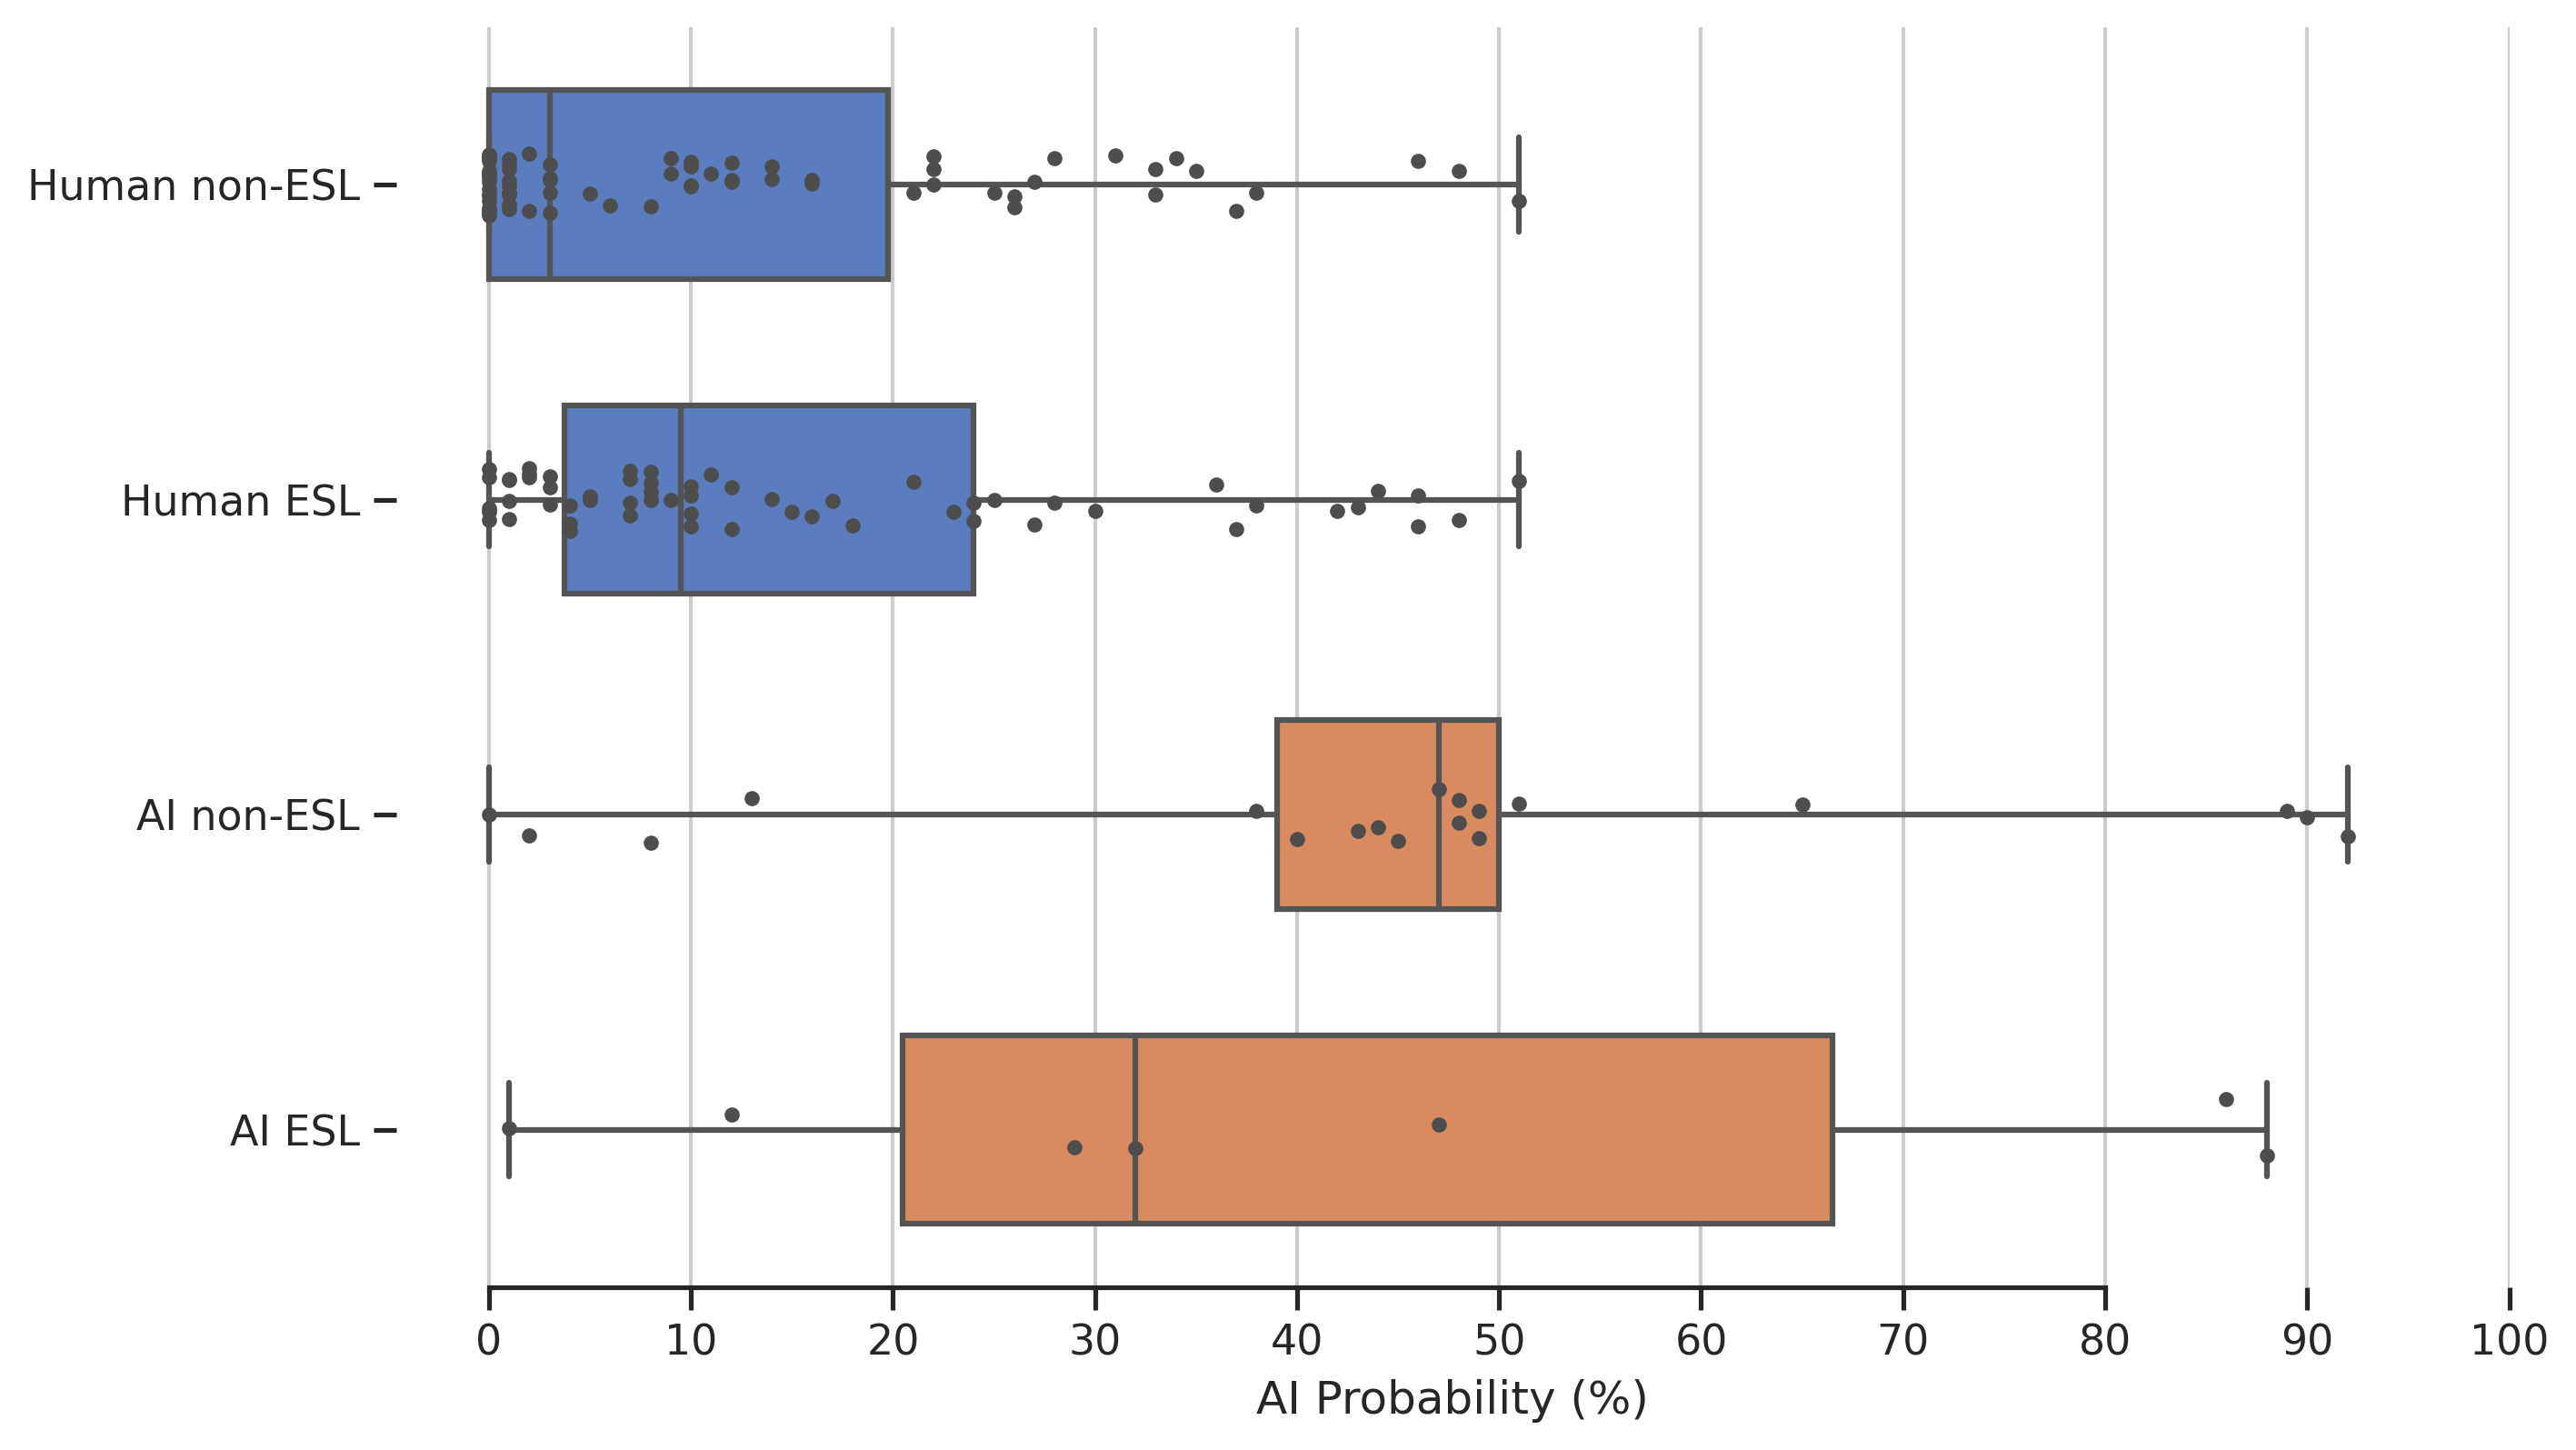

In [10]:
# Assuming df is your DataFrame after loading and processing your data
# Load your dataset
df = pd.read_csv(file_path)

# Creating a new column for ESL classification
df['ESL'] = df['Is English your first language?'].map({'Yes': 'non-ESL', 'No': 'ESL'})
# Combining the AI/Human and ESL columns for categorization
df['Category'] = df['AI/Human'] + ' ' + df['ESL']

# Define the order for the categories
category_order = ['Human non-ESL', 'Human ESL', 'AI non-ESL', 'AI ESL']

# Initialize the figure
plt.figure(figsize=(10, 6))
sns.set_theme(style="ticks")

palette_blues_and_orange = [sns.color_palette("muted")[0], sns.color_palette("muted")[0], sns.color_palette("muted")[1], sns.color_palette("muted")[1]]
# Create the boxplot with specified order
ax = sns.boxplot(data=df, x='AI Probability (%)', y='Category', order=category_order, whis=[0, 100], width=.6, palette=palette_blues_and_orange)

# Add in points to show each observation
sns.stripplot(data=df, x='AI Probability (%)', y='Category', order=category_order, size=4, color=".3", jitter=True)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set_ylabel('')
sns.despine(trim=True, left=True)

# Adjust x-axis ticks if needed
n_bins = 10  # Assuming you want bins of size 10 for x-axis ticks
plt.xticks(range(0, 101, n_bins))  # Setting x-axis ticks to represent each 10% interval

plt.show()

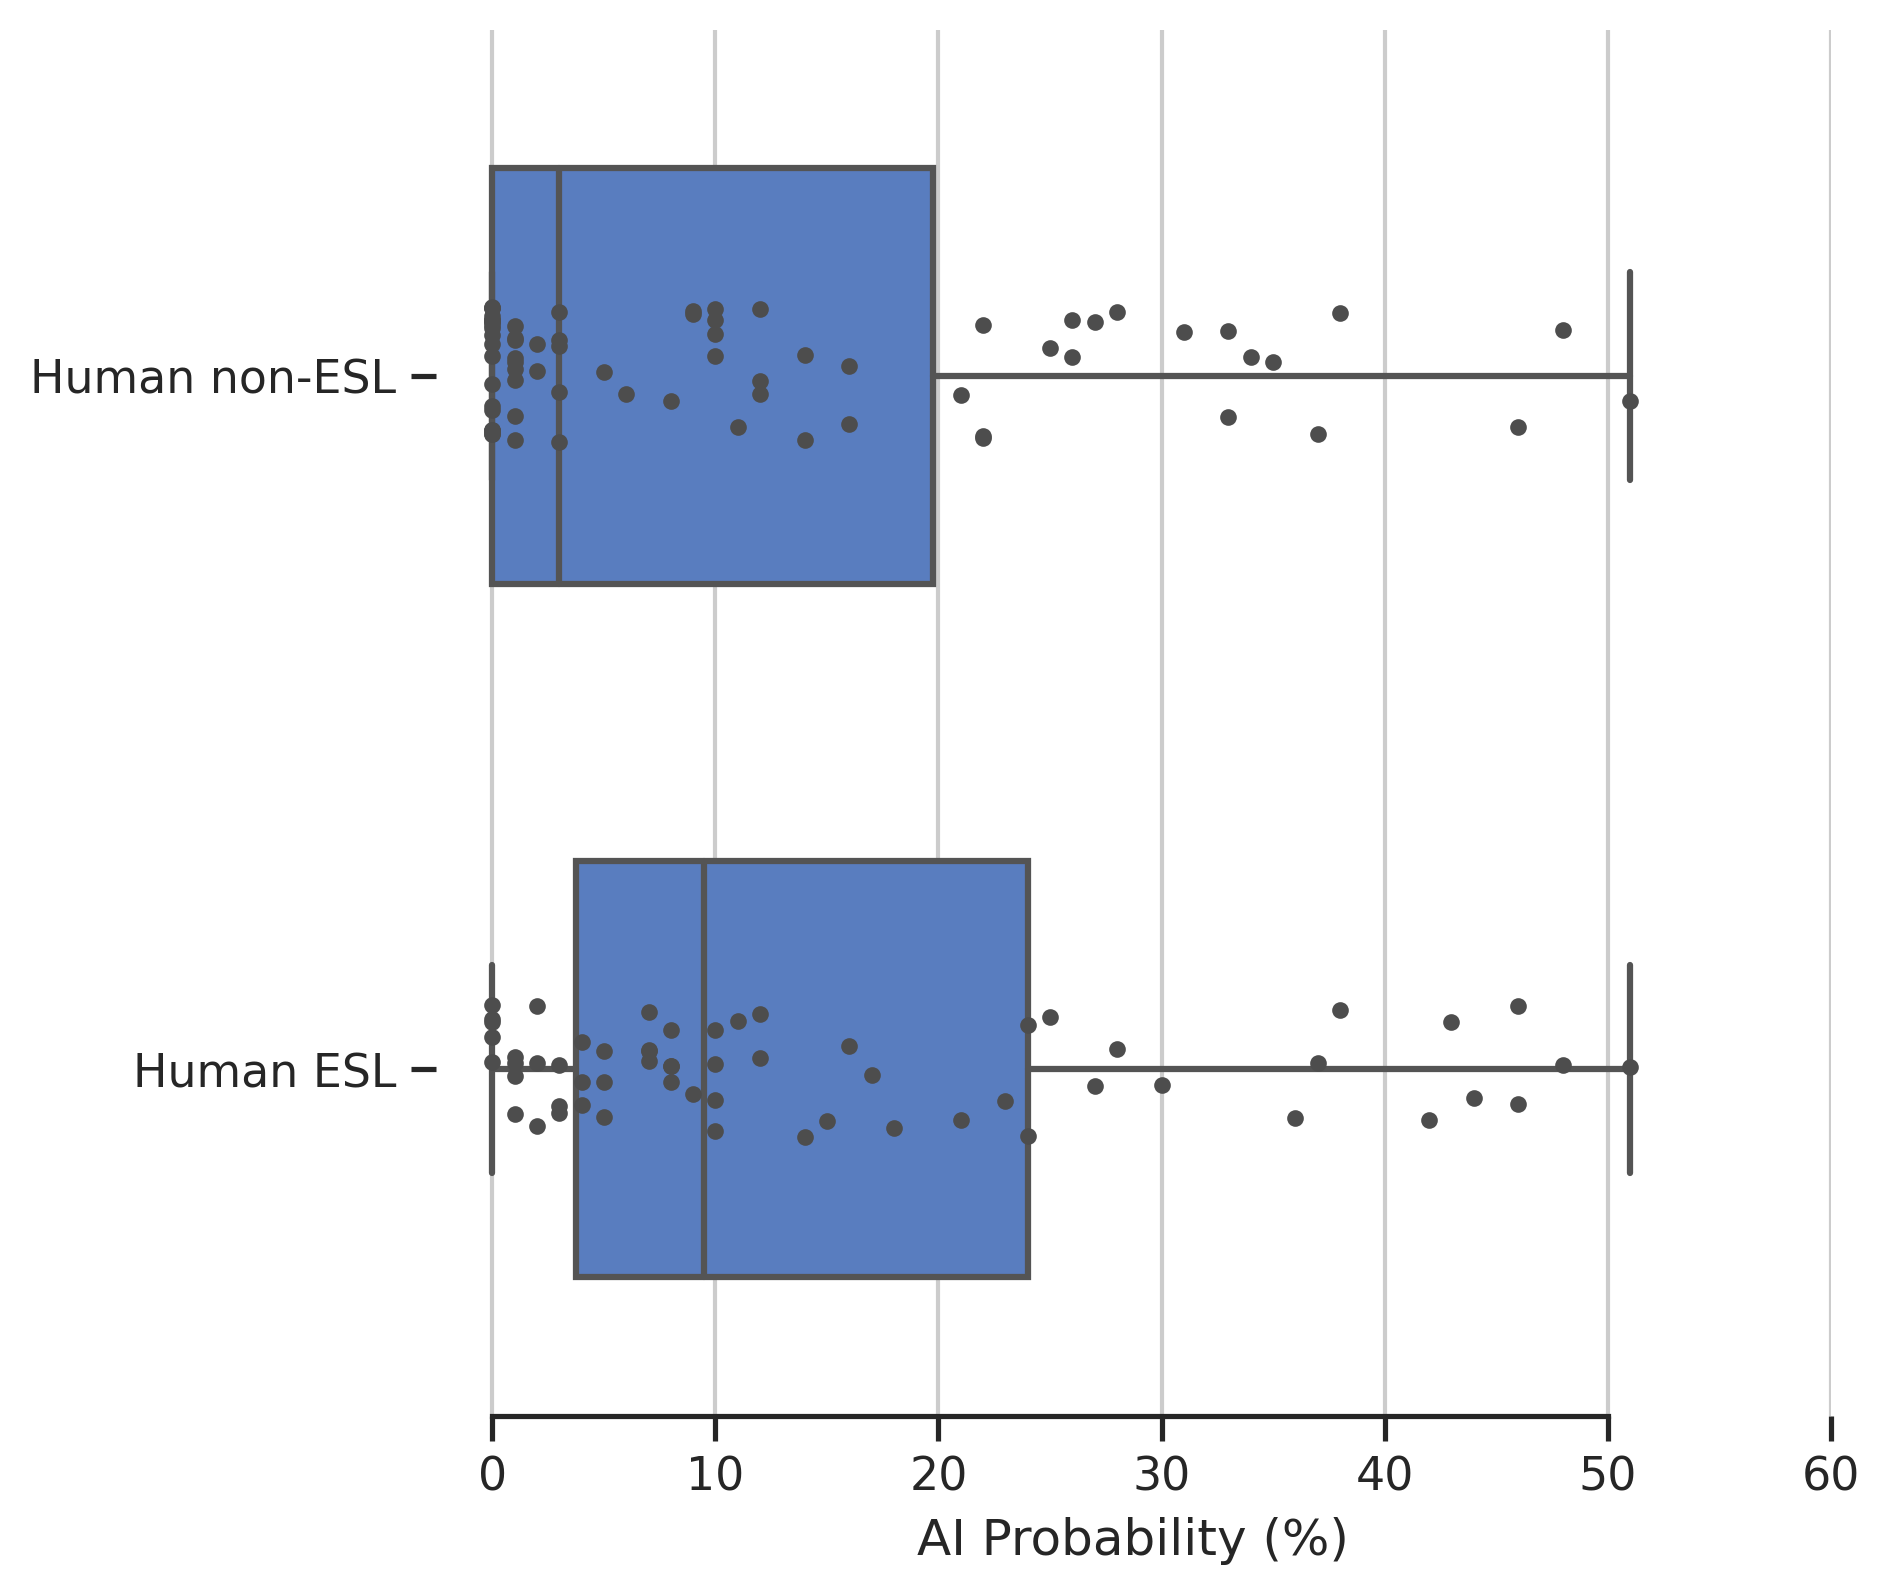

In [11]:
# Human comparison only
df = pd.read_csv(file_path)
df['ESL'] = df['Is English your first language?'].map({'Yes': 'non-ESL', 'No': 'ESL'})
df['Category'] = df['AI/Human'] + ' ' + df['ESL']

# Filtering the DataFrame to include only Human written essays
df_human_only = df[df['AI/Human'] == 'Human']

# Updating the category order to include only Human categories
category_order_human_only = ['Human non-ESL', 'Human ESL']

# Initialize the figure
plt.figure(figsize=(6, 6))
sns.set_theme(style="ticks")

# Define palette for Human categories only
palette_blues_human_only = [sns.color_palette("muted")[0]] * 2

# Create the boxplot with specified order for Human categories
ax = sns.boxplot(data=df_human_only, x='AI Probability (%)', y='Category', order=category_order_human_only, whis=[0, 100], width=.6, palette=palette_blues_human_only)

# Add in points to show each observation for Human categories
sns.stripplot(data=df_human_only, x='AI Probability (%)', y='Category', order=category_order_human_only, size=4, color=".3", jitter=True)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set_ylabel('')
sns.despine(trim=True, left=True)

# Adjust x-axis ticks if needed
n_bins = 10  # Assuming you want bins of size 10 for x-axis ticks
plt.xticks(range(0, 61, n_bins))  # Setting x-axis ticks to represent each 10% interval

plt.show()

Human non-ESL Summary Statistics:
 count    74.000000
mean     11.040541
std      13.810299
min       0.000000
25%       0.000000
50%       3.000000
75%      19.750000
max      51.000000
Name: AI Probability (%), dtype: float64

Human ESL Summary Statistics:
 count    60.000000
mean     15.050000
std      14.936504
min       0.000000
25%       3.750000
50%       9.500000
75%      24.000000
max      51.000000
Name: AI Probability (%), dtype: float64


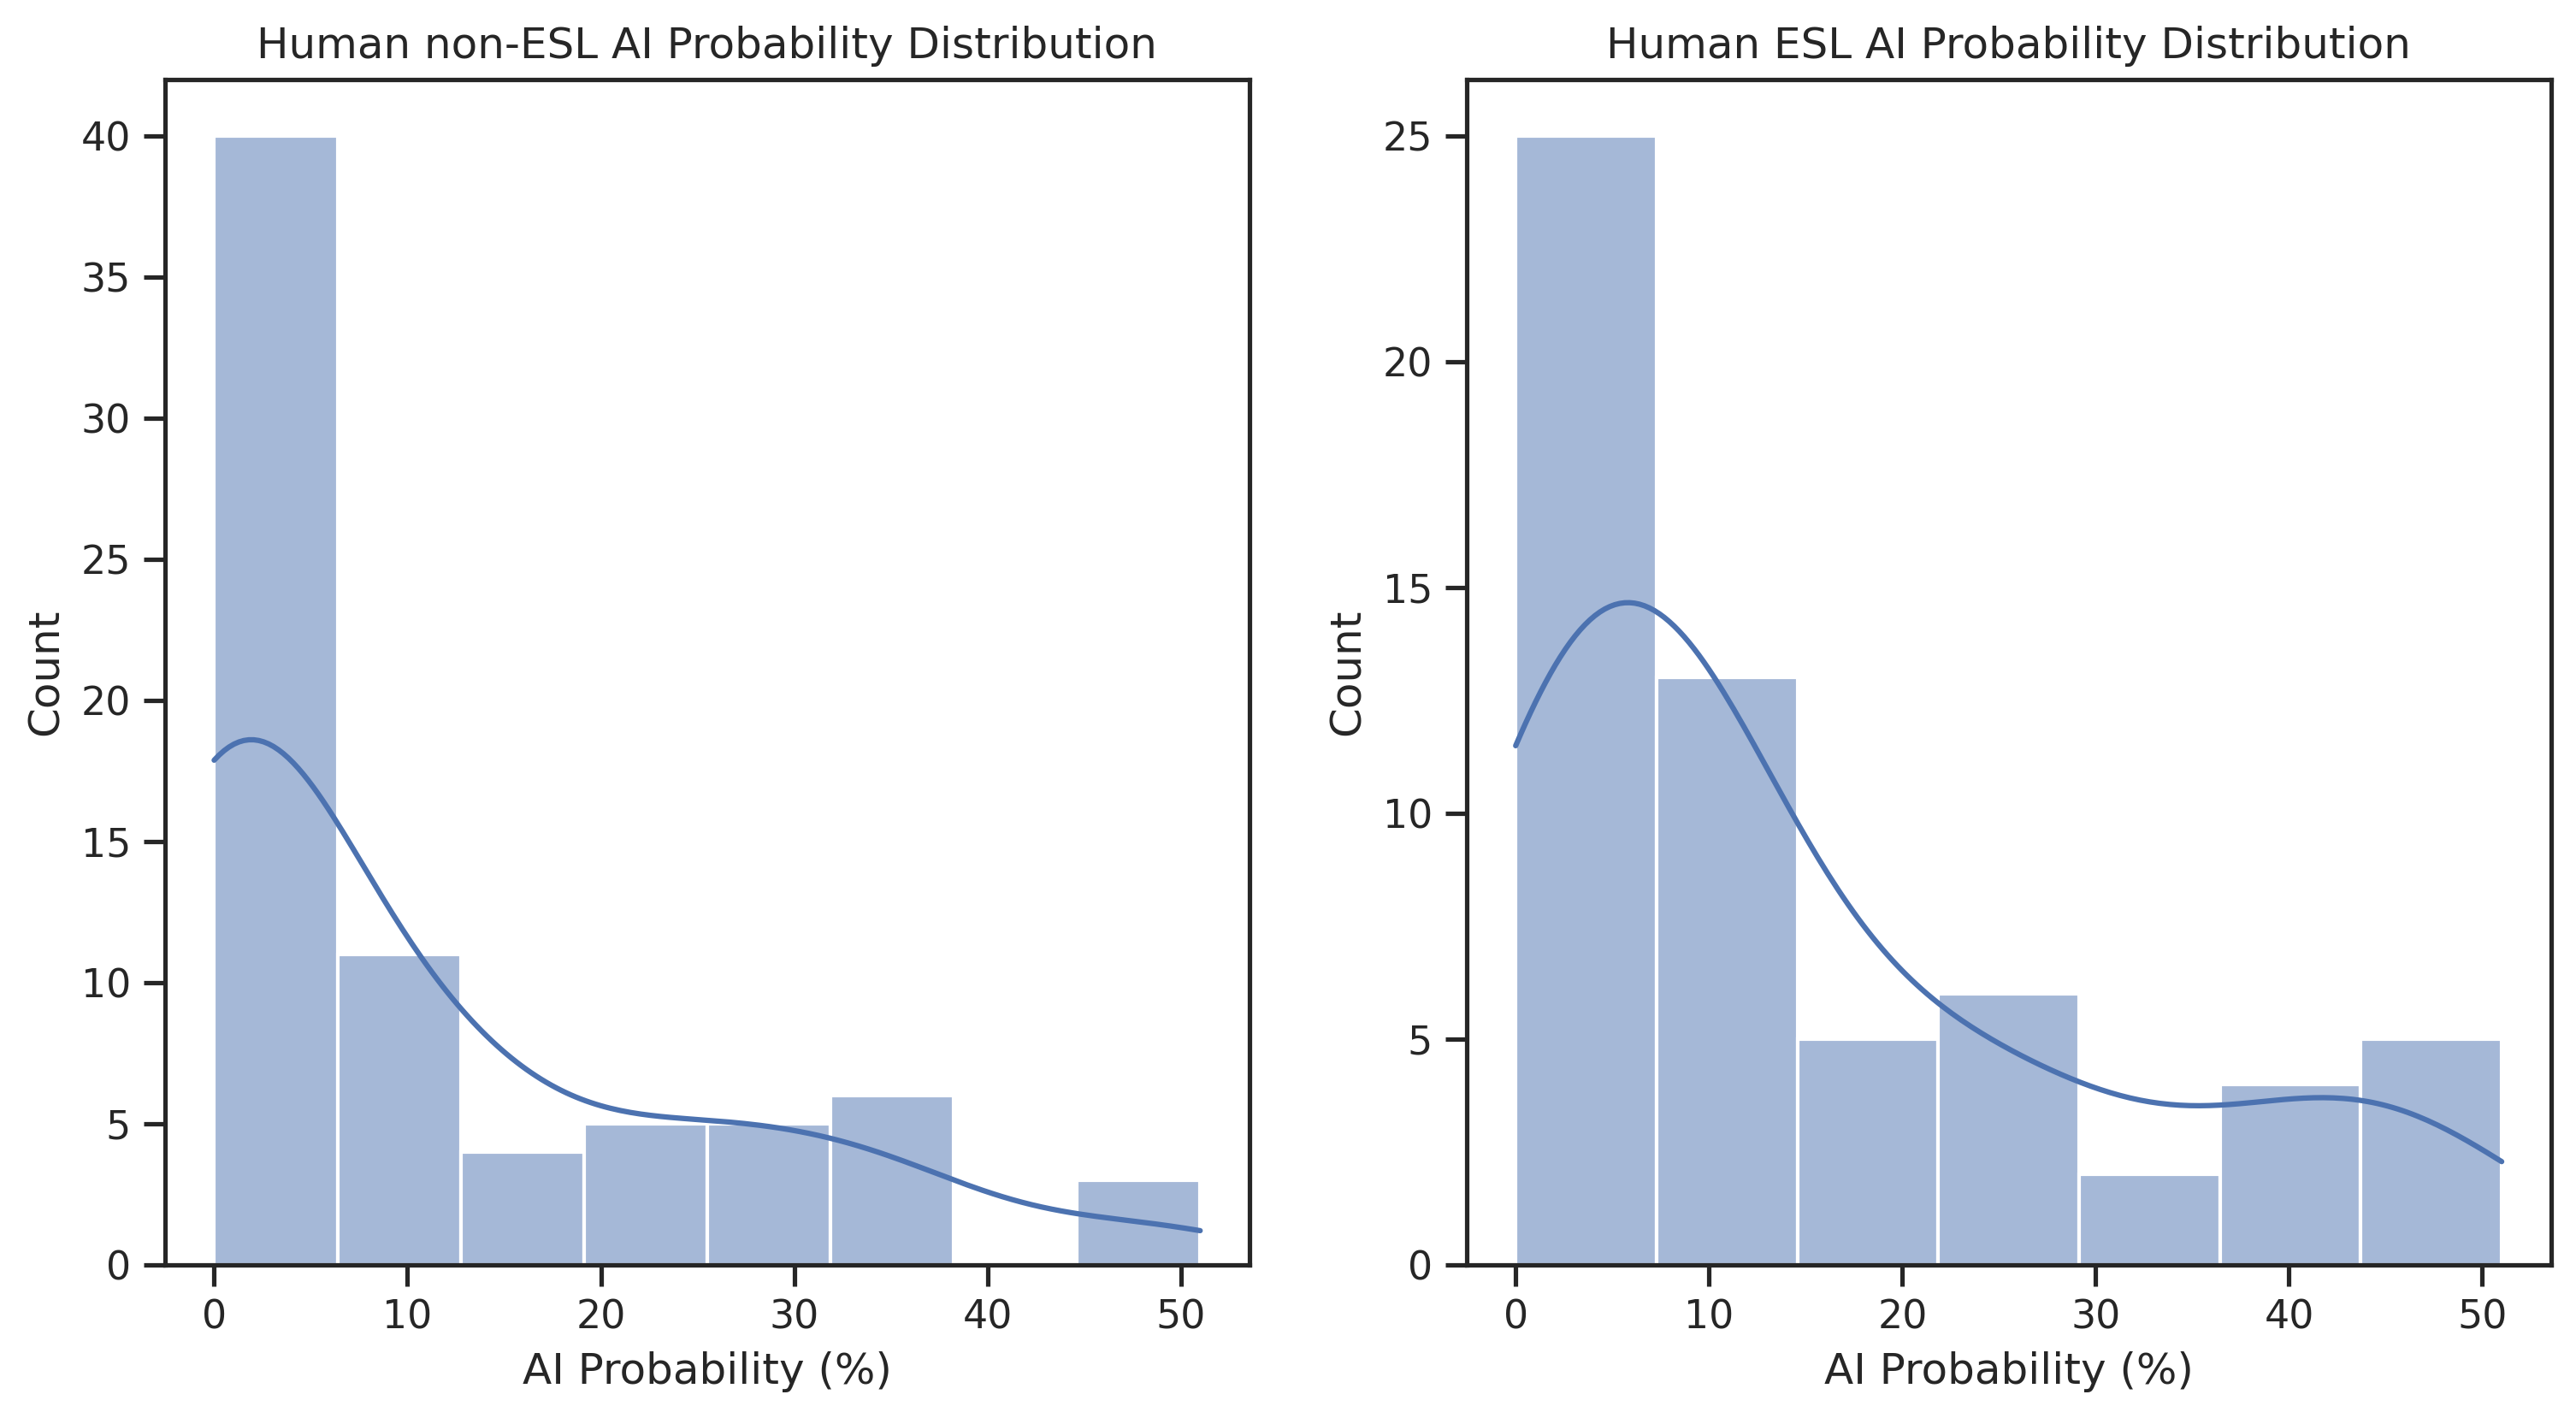

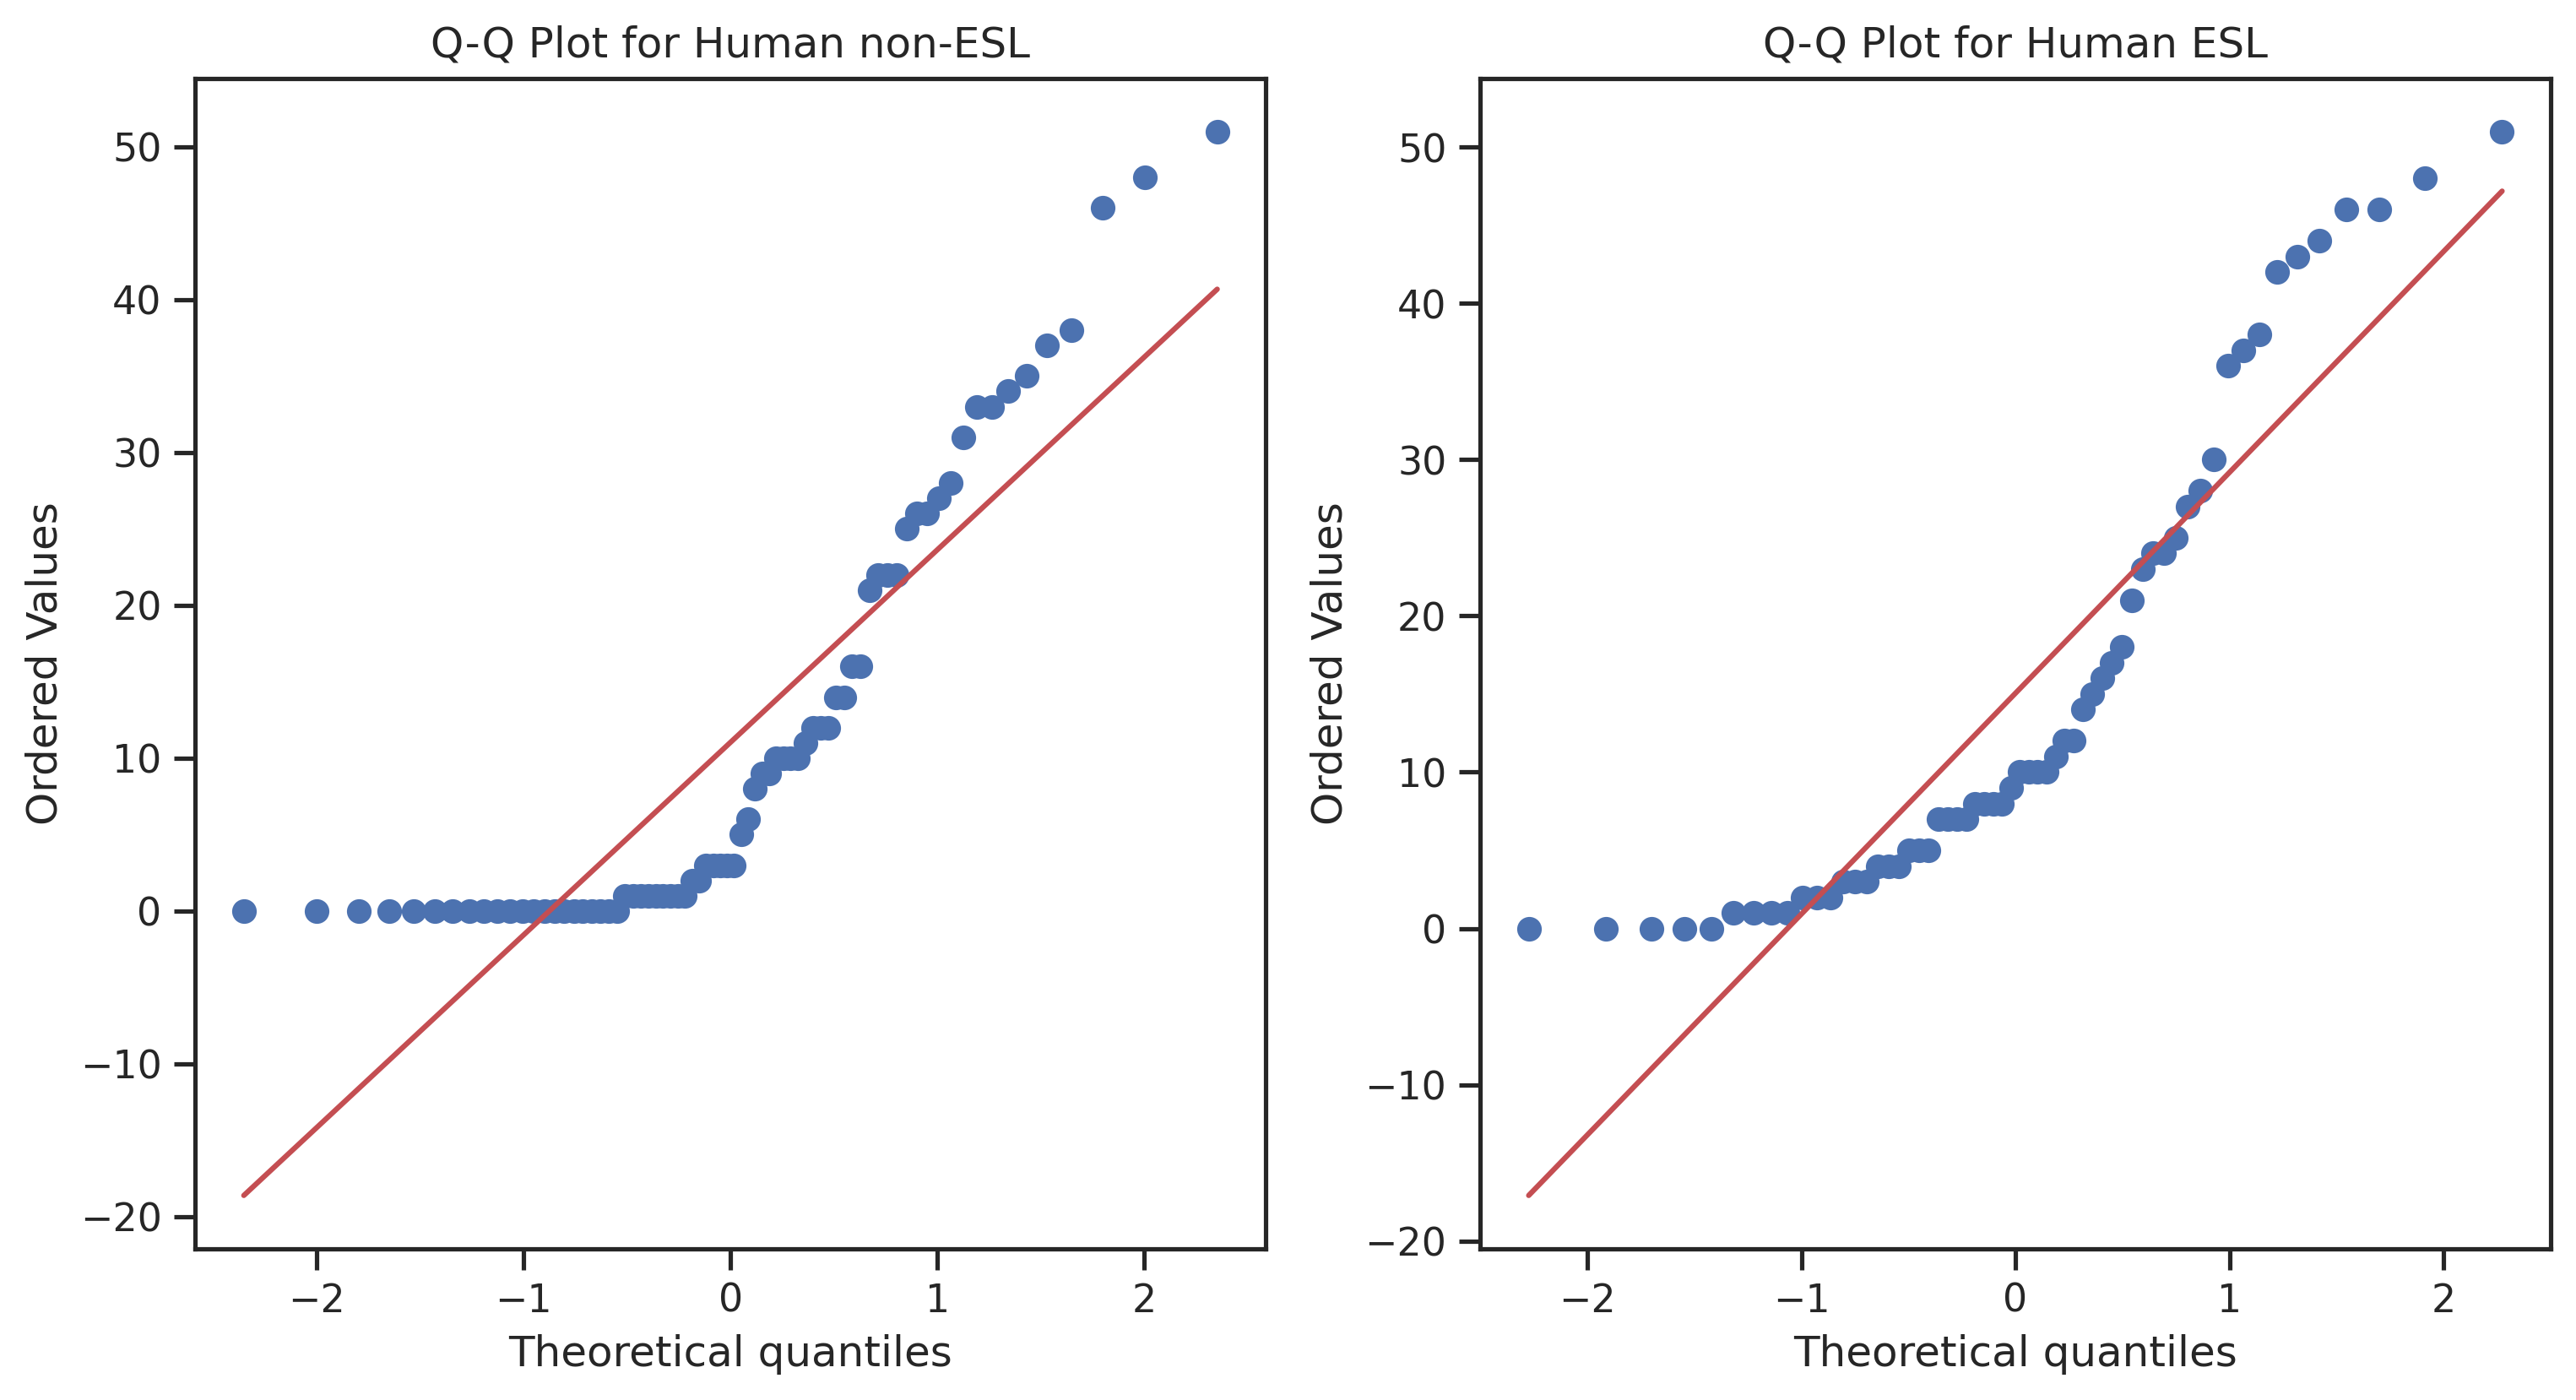

Shapiro-Wilk Test for Human non-ESL:
 ShapiroResult(statistic=0.7959524989128113, pvalue=9.61164658974667e-09)
Shapiro-Wilk Test for Human ESL:
 ShapiroResult(statistic=0.8465619683265686, pvalue=2.4154103357432177e-06)


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load your dataset
df = pd.read_csv(file_path)

# Filter data for Human non-ESL and Human ESL groups
human_non_esl = df[(df['AI/Human'] == 'Human') & (df['Is English your first language?'] == 'Yes')]['AI Probability (%)']
human_esl = df[(df['AI/Human'] == 'Human') & (df['Is English your first language?'] == 'No')]['AI Probability (%)']

# Display summary statistics
print("Human non-ESL Summary Statistics:\n", human_non_esl.describe())
print("\nHuman ESL Summary Statistics:\n", human_esl.describe())

# Histograms for visual inspection
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(human_non_esl, kde=True)
plt.title('Human non-ESL AI Probability Distribution')
plt.subplot(1, 2, 2)
sns.histplot(human_esl, kde=True)
plt.title('Human ESL AI Probability Distribution')
plt.show()

# Q-Q Plots for normality check
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(human_non_esl, dist="norm", plot=plt)
plt.title('Q-Q Plot for Human non-ESL')
plt.subplot(1, 2, 2)
stats.probplot(human_esl, dist="norm", plot=plt)
plt.title('Q-Q Plot for Human ESL')
plt.show()

# Shapiro-Wilk Test for normality
sw_test_non_esl = stats.shapiro(human_non_esl)
sw_test_esl = stats.shapiro(human_esl)
print("Shapiro-Wilk Test for Human non-ESL:\n", sw_test_non_esl)
print("Shapiro-Wilk Test for Human ESL:\n", sw_test_esl)


In [13]:
# Perform the Mann-Whitney U test, because we have a non-normal distribution
mannwhitneyu_result = stats.mannwhitneyu(human_non_esl, human_esl, alternative='two-sided')

print("Mann-Whitney U test result:", mannwhitneyu_result)

Mann-Whitney U test result: MannwhitneyuResult(statistic=1694.5, pvalue=0.018244182343489547)


This agrees with the Stanford paper: https://arxiv.org/abs/2304.02819.

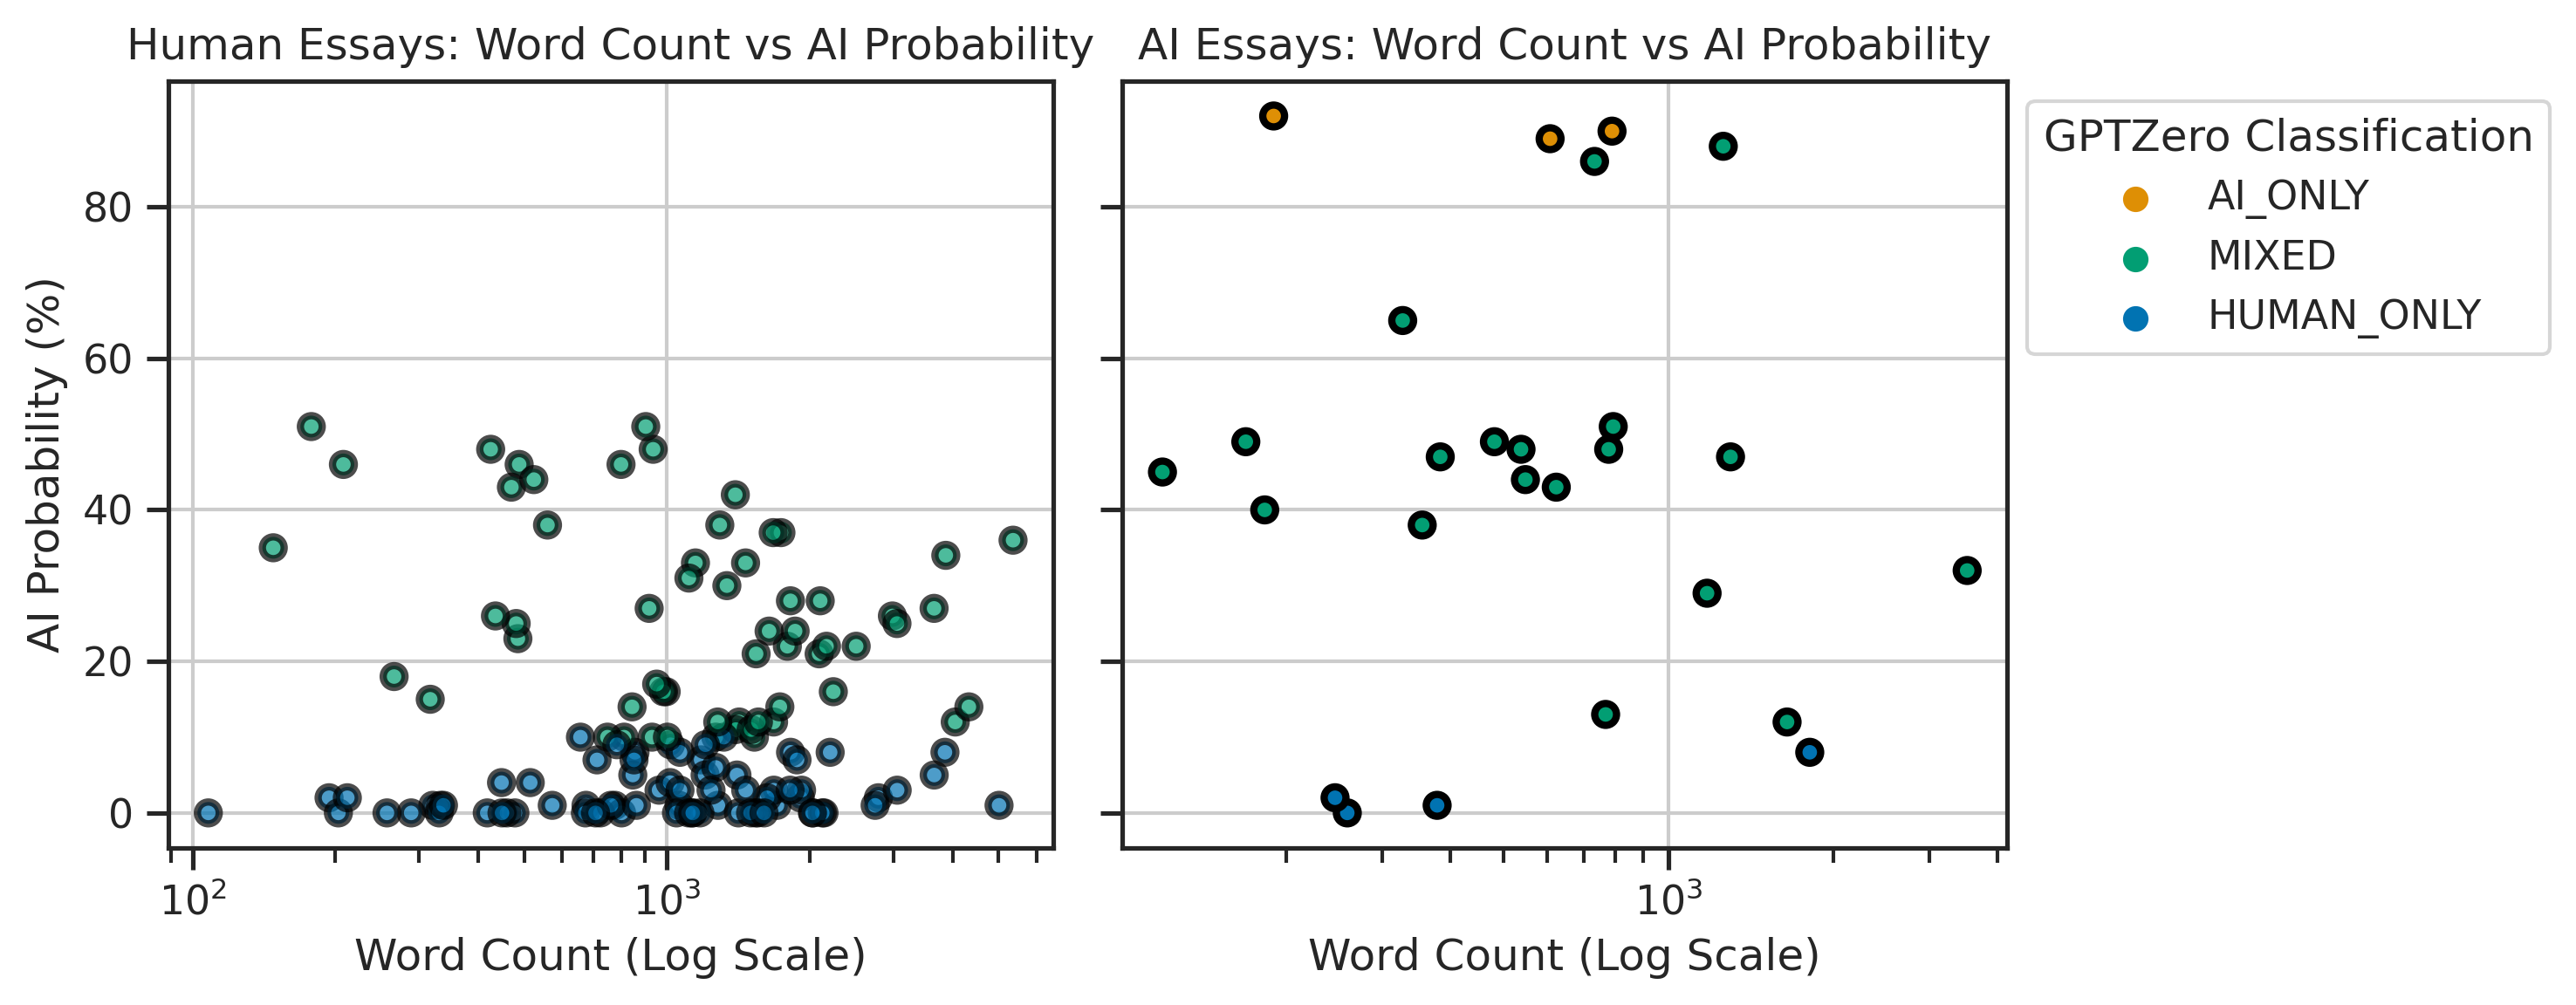

In [14]:
# Examining word count versus AI probability.
def plot_word_count_vs_ai_probability_colored_with_alpha_split_ai_human(file_path):

    df = pd.read_csv(file_path)

    # Define color palette for the 'Classification' categories
    palette = {'HUMAN_ONLY': sns.color_palette("colorblind")[0], 'MIXED': sns.color_palette("colorblind")[2], 'AI_ONLY': sns.color_palette("colorblind")[1]}

    # Creating two subplots based on 'AI/Human' column
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    # Filter the dataframe for Human and AI essays
    df_human = df[df['AI/Human'] == 'Human']
    df_ai = df[df['AI/Human'] == 'AI']

    # Plot for Human essays
    human_plot = sns.scatterplot(
        x='Word Count',
        y='AI Probability (%)',
        hue='Classification',
        data=df_human,
        palette=palette,
        edgecolor='black',
        linewidth=2,
        alpha=0.7,
        ax=axes[0],
        legend=False  # Exclude legend from this plot
    )
    axes[0].set_xscale('log')
    axes[0].set_title('Human Essays: Word Count vs AI Probability')
    axes[0].set_xlabel('Word Count (Log Scale)')
    axes[0].set_ylabel('AI Probability (%)')
    axes[0].grid(True)

    # Plot for AI essays
    sns.scatterplot(
        x='Word Count',
        y='AI Probability (%)',
        hue='Classification',
        data=df_ai,
        palette=palette,
        edgecolor='black',
        linewidth=2,
        alpha=1,
        ax=axes[1],
    )
    axes[1].set_xscale('log')
    axes[1].set_title('AI Essays: Word Count vs AI Probability')
    axes[1].set_xlabel('Word Count (Log Scale)')
    axes[1].grid(True)

    # Shared legend in the Human essays plot
    axes[1].legend(title='GPTZero Classification', loc='upper left')
    sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

plot_word_count_vs_ai_probability_colored_with_alpha_split_ai_human(file_path)


One confusing thing that GPTZero does is it provides a classification of AI Only, Mixed, and Human Only. This Mixed value is a bit of an escape for them.

In [15]:
# Examining word count versus AI probability.
df = pd.read_csv(file_path)

# Calculating Pearson's r and R^2 for the entire dataset
r, p_value = stats.pearsonr(df['Word Count'], df['AI Probability (%)'])
r_squared = r**2

print(f"r = {r:.4f}")
print(f"r^2 = {r_squared:.4f}")
print(f"p = {p_value:.4f}")

r = -0.1257
r^2 = 0.0158
p = 0.1133


In examining the relationship between word count and AI probability, a Pearson correlation analysis yielded a coefficient $r$ of -0.126, indicating a weak negative correlation. This suggests a slight decrease in AI probability with increasing word count. However, the coefficient of determination $R^2$ of 0.016 implies that only a small fraction (1.6%) of the variation in AI probability is explained by word count. Additionally, the correlation was not statistically significant (p-value = 0.114), suggesting that the observed relationship may be due to random variation. Therefore, the impact of word count on AI probability appears to be minimal and should be interpreted cautiously.

Initially, I would have expected that as the detectors sees more of the essay, it will become more and more "sure" that it is AI or not AI, but that does not seem to be the case.

In [16]:
# Load the dataset from the CSV file
df = pd.read_csv(file_path)

# Sorting the DataFrame by 'AI Probability (%)' in descending order
sorted_df = df.sort_values(by='AI Probability (%)', ascending=False)

# Selecting the top 10 rows
top_10_essays = sorted_df[['File Name', 'AI Probability (%)', 'AI/Human', 'Is English your first language?']].head(10)

# Display the top 10 essays with their AI probabilities and labels
print(top_10_essays)

                                 File Name  AI Probability (%) AI/Human  \
2    f9167bfcccd2d324146b13bd93373718.docx                  92       AI   
25   242902fead0e4256a0f6d97cb5e45ad4.docx                  90       AI   
34   7f7a52159879399e13032917c878f78f.docx                  89       AI   
113  e0c7875a3702fe708c0a98cd2609418c.docx                  88       AI   
58   31dd6b1007b91cae0a66700e7667485a.docx                  86       AI   
149  ac8ae791a4daef71c2ae027f7a247482.docx                  65       AI   
98   10fc827a6937888e49242ef8d3e35a1e.docx                  51    Human   
3    f6adfb8813c03715fa0c04f6716355b2.docx                  51       AI   
134  24026ea1ba26353452a31a29e5969aa0.docx                  51    Human   
141  c2108920e5bb596a4a6fc3cb3e697488.docx                  49       AI   

    Is English your first language?  
2                               Yes  
25                              Yes  
34                              Yes  
113                   

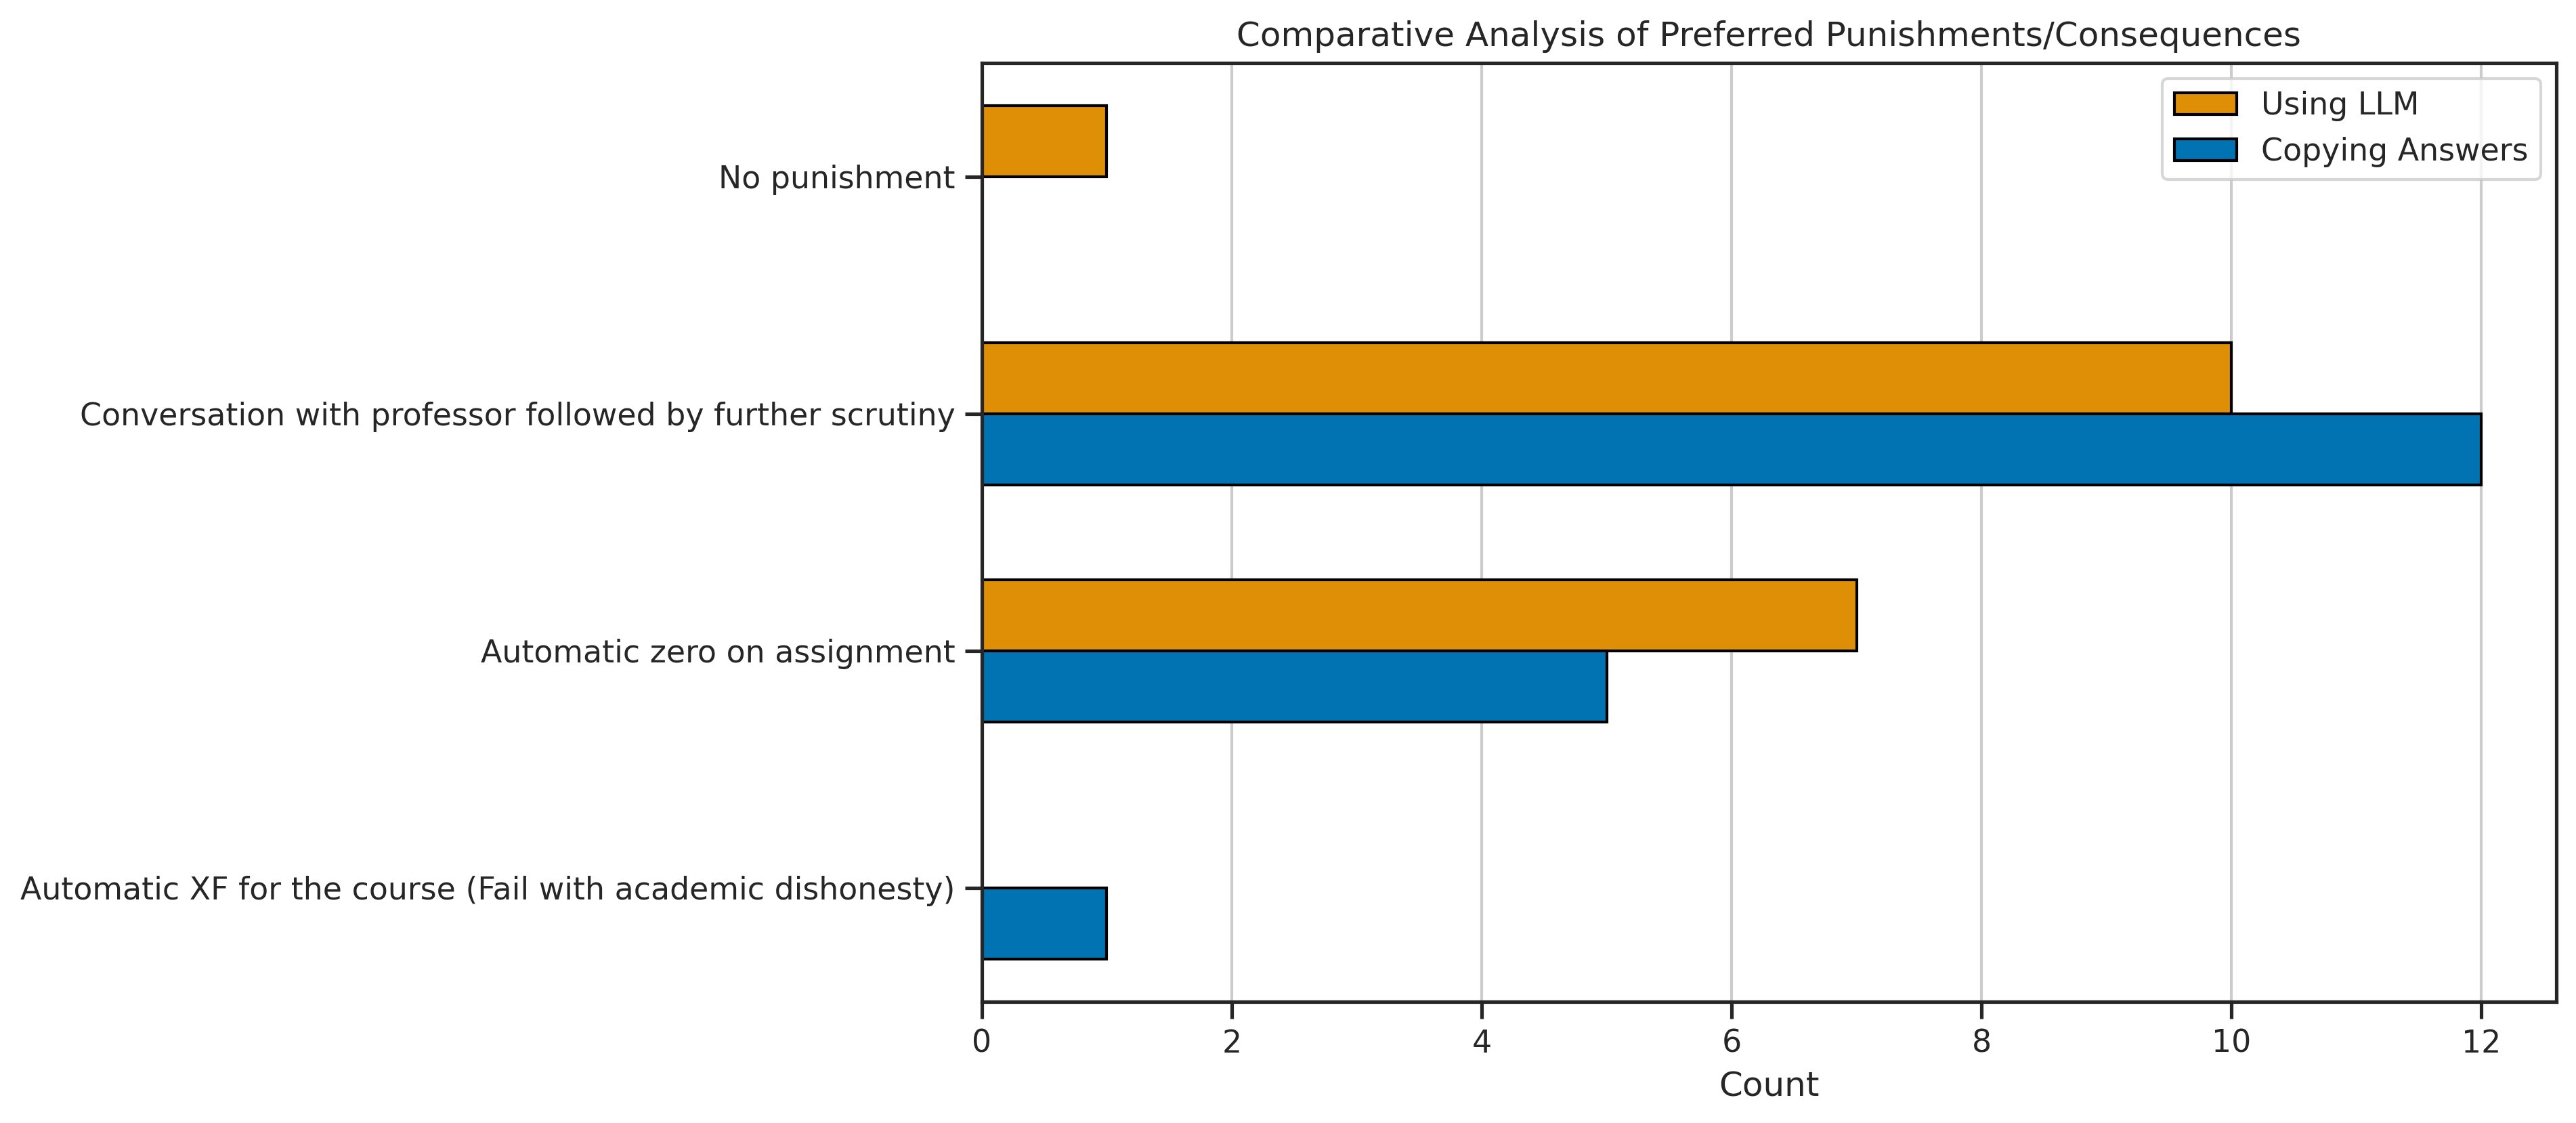

In [17]:
data = pd.read_csv(file_path)

# Grouping data by Timestamp and getting the last entry for each timestamp to avoid duplicates
grouped_data = data.groupby('Timestamp').last()

# Extracting the relevant columns for analysis
copying_punishment_grouped = grouped_data['If a student is caught copying their answers on a writing assignment from another student, what should the punishment be?']
llm_consequence_grouped = grouped_data['Suppose a student is using a Large Language Model (LLM), such as ChatGPT, when they are not allowed to use an LLM on an assignment. What should the consequence be when a student gets caught using an LLM?']

# Counting the unique responses for both questions
copying_punishment_counts_grouped = copying_punishment_grouped.value_counts()
llm_consequence_counts_grouped = llm_consequence_grouped.value_counts()

# Preparing data for the bar chart
labels = copying_punishment_counts_grouped.index.union(llm_consequence_counts_grouped.index).tolist()
copying_counts = [copying_punishment_counts_grouped.get(label, 0) for label in labels]
llm_counts = [llm_consequence_counts_grouped.get(label, 0) for label in labels]

# Creating a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Position of bars on the y-axis
y_positions = np.arange(len(labels))

# Making the plot
ax.barh(y_positions + 0.15, llm_counts, height=0.3, color=sns.color_palette("colorblind")[1], label='Using LLM', edgecolor='black')
ax.barh(y_positions - 0.15, copying_counts, height=0.3, color=sns.color_palette("colorblind")[0], label='Copying Answers', edgecolor='black')


# Adding labels
ax.xaxis.grid(True)
ax.set_yticks(y_positions)
ax.set_yticklabels(labels)
ax.set_xlabel('Count')
ax.set_title('Comparative Analysis of Preferred Punishments/Consequences')


# Adding a legend
ax.legend()

# Display the plot
plt.show()